<a href="https://colab.research.google.com/github/Shivansh010/WhatsApp-group-data-analysis/blob/main/Wingies_Mech_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Winges Mech EDA

## Installing libraries

In [ ]:
!pip install advertools

## Importing libraries

In [ ]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import advertools as adv
from collections import Counter
import statistics
from matplotlib import style
style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

## Uploading and reading chat file

In [ ]:
from google.colab import files

uploaded = files.upload() 

for fn in uploaded.keys():
  print('You uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))


Saving Chat.txt to Chat (1).txt
You uploaded file "Chat.txt" with length 1103922 bytes


In [ ]:
my_file = open('Chat.txt', 'r')
content = my_file.read()

## Cleaning the chat.txt file

### Creating list of date 

In [ ]:
date_pattern = re.compile(r'\d\d?/\d\d?/\d\d,')
dates = re.finditer(date_pattern, content)

In [ ]:
date_index = []
for date in dates:
  date_index.append((date.start(),date.end()))

In [ ]:
list_dates = []
for i in range(0,len(date_index)):
  list_dates.append(content[date_index[i][0]:date_index[i][1]].replace(',',''))

### Creating list of message details

In [ ]:
list_message_details = []
for i in range(0,len(date_index)-1):
  list_message_details.append(content[date_index[i][1]:date_index[i+1][0]][9:])

In [ ]:
list_message_details.append(content[date_index[-1][1]:len(content)][9:])

### Creating list of time

In [ ]:
list_time_details = []
for i in range(0,len(date_index)-1):
  list_time_details.append(content[date_index[i][1]:date_index[i+1][0]][1:6])

In [ ]:
list_time_details.append(content[date_index[-1][1]:len(content)][1:6])

### Creating list of names from message details

In [ ]:
name_pattern = re.compile(r'^[A-Z][a-z]+\s[A-Z][a-z]+:\s')

In [ ]:
list_names = []
list_index = [] # For saving index so that data list can be modified afterwards
for i in range(0,len(list_message_details)):
  name = re.finditer(name_pattern, list_message_details[i])
  for n in name:
    list_names.append(list_message_details[i][n.start():n.end()].replace(': ',''))
    list_index.append(i)

### Creating list of messages from message details

In [ ]:
list_messages = []
for i in range(0,len(list_message_details)):
  message = re.finditer(name_pattern, list_message_details[i])
  for m in message:
    list_messages.append(list_message_details[i][m.end():].replace('\n',' ').rstrip())

### Ensuring all lists have same elements

In [ ]:
list_dates = [list_dates[i] for i in list_index]
list_time_details = [list_time_details[i] for i in list_index]

## Creating pandas data frame

In [ ]:
df_dict = {'Date':list_dates,'Time':list_time_details,'Name':list_names,'Message':list_messages}
df = pd.DataFrame(df_dict)

## Analysing dataframe

### Viewing data

In [ ]:
df.head(5)

,Date,Time,Name,Message
0,8/6/20,17:47,Keerthan Ramesh,"Current reg- 445, 6101, 781, IE 503, psycho"
1,8/6/20,17:47,Keerthan Ramesh,Daaldo be sab
2,8/6/20,17:47,Anuj Agarwal,311 main kon sa section le rahe ho?
3,8/6/20,17:48,Advait Padaval,I'm done with it
4,8/6/20,17:48,Advait Padaval,Dupehar ko diya abhi


In [ ]:
df.tail(5)

,Date,Time,Name,Message
17825,6/1/21,00:55,Keerthan Ramesh,<Media omitted>
17826,6/1/21,00:58,Advait Padaval,what on earth is this XD
17827,6/1/21,01:40,Keerthan Ramesh,You know 😂
17828,6/1/21,01:41,Abhinav Apurva,Fucking Johnny
17829,6/1/21,01:43,Advait Padaval,Fucking kyu bro 😂 Aadmi bura Nahi tha ❤️


### Taking only sem 6 data from 1/7/21 to 5/4/21

In [ ]:
start = df[df.Date=='1/7/21'].index[0]
end = df[df.Date=='5/4/21'].index[-1]
df_sem_6 = df[start:end+1]

### Analysing media data

In [ ]:
img = df_sem_6[df_sem_6.Message=='<Media omitted>']

In [ ]:
img_count = pd.DataFrame(img.Name.value_counts()).reset_index().set_axis(["Name", "Count"], axis=1)

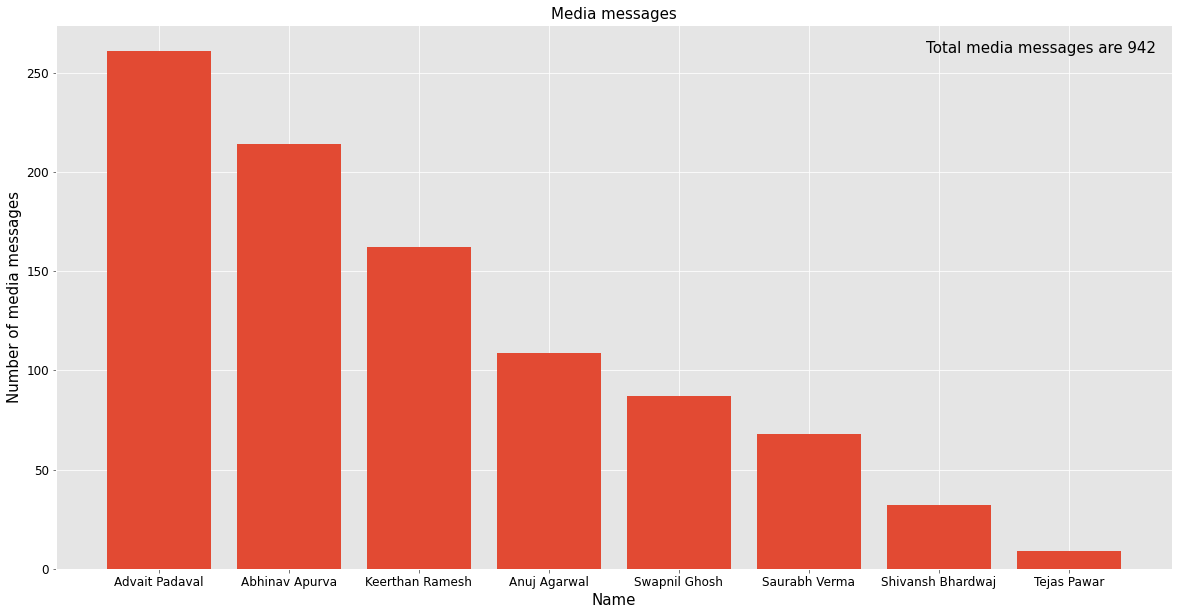

In [ ]:
plt.bar(img_count.Name,img_count.Count)
plt.title('Media messages',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Name',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)
plt.text(5.9, 260, 'Total media messages are '+str(len(img)), color = 'black', fontsize=15)

plt.show()

### Analysing deleted messages

In [ ]:
delete = df_sem_6[df_sem_6.Message=='This message was deleted']

In [ ]:
delete_count = pd.DataFrame(delete.Name.value_counts()).reset_index().set_axis(["Name", "Count"], axis=1)

In [ ]:
delete_count = delete_count.append({'Name':'Shivansh Bhardwaj', 'Count':0},ignore_index=True)

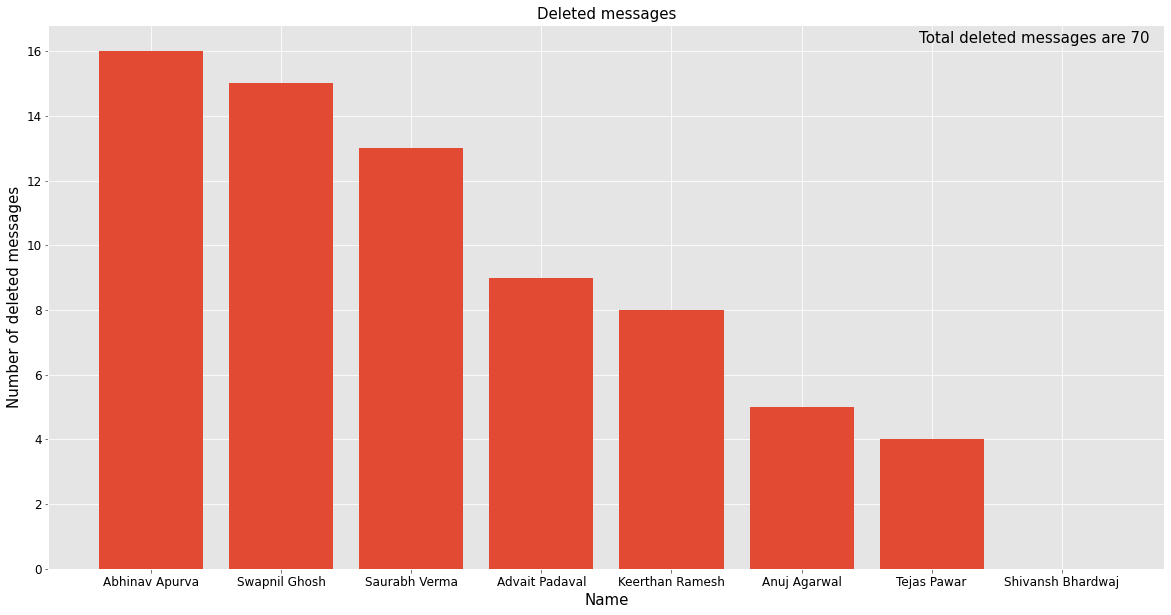

In [ ]:
plt.bar(delete_count.Name,delete_count.Count)
plt.title('Deleted messages',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Name',color = 'black', fontsize=15)
plt.ylabel('Number of deleted messages',color = 'black', fontsize=15)
plt.text(5.9, 16.25, 'Total deleted messages are '+str(len(delete)), color = 'black', fontsize=15)

plt.show()

### Removing deleted and media messages

In [ ]:
df_text = df_sem_6[~(df_sem_6.Message=='This message was deleted') & ~(df_sem_6.Message=='<Media omitted>')].reset_index()[['Date','Time','Name','Message']]

### Further cleaning the messages

In [ ]:
df_text.head()

,Date,Time,Name,Message
0,1/7/21,08:49,Abhinav Apurva,Me714 me bohot saare padhne waale log dikh rhe bc
1,1/7/21,08:50,Saurabh Verma,Achha hai course
2,1/7/21,08:50,Saurabh Verma,Interesting lag rha
3,1/7/21,08:51,Abhinav Apurva,Interest Kb se dekhne laga bc tu
4,1/7/21,08:51,Abhinav Apurva,Bc darade bhi hai


In [ ]:
# Delete all messages with len greater than 212 note this number is obtained manually
short_message_index = []
for i in range(0,len(df_text)):
  if len(df_text.Message[i])<=212:
    short_message_index.append(i)
df_text_1 = df_text.iloc[short_message_index,:]    

In [ ]:
# This list is made manually
rows_to_delete = [4800,5143,7439,8469,1111,598,1913,8371,2052,2923,256,8736,5242,9743,5239,7914,7325,7915,2592,4801,2832,8056,10011]
# Deleting long messages, long forwards, hyperlinks
df_text_1 = df_text_1.drop(rows_to_delete, axis=0)

In [ ]:
# Replacing phone numbers with names
df_text_1.Message = df_text_1.Message.apply(lambda x: x.replace('@918102874109','Abhinav').replace('@918390181711','Advait').replace('@918149188382','Keerthan').replace('@918003537584','Shivansh').replace('@916264837310','Anuj').replace('@916264495379','Saurabh').replace('@919833690912','Swapnil').replace('@9141423333','Tejas'))

### Visualizing text messages

In [ ]:
text_count = pd.DataFrame(df_text_1.Name.value_counts()).reset_index().set_axis(["Name", "Count"], axis=1)

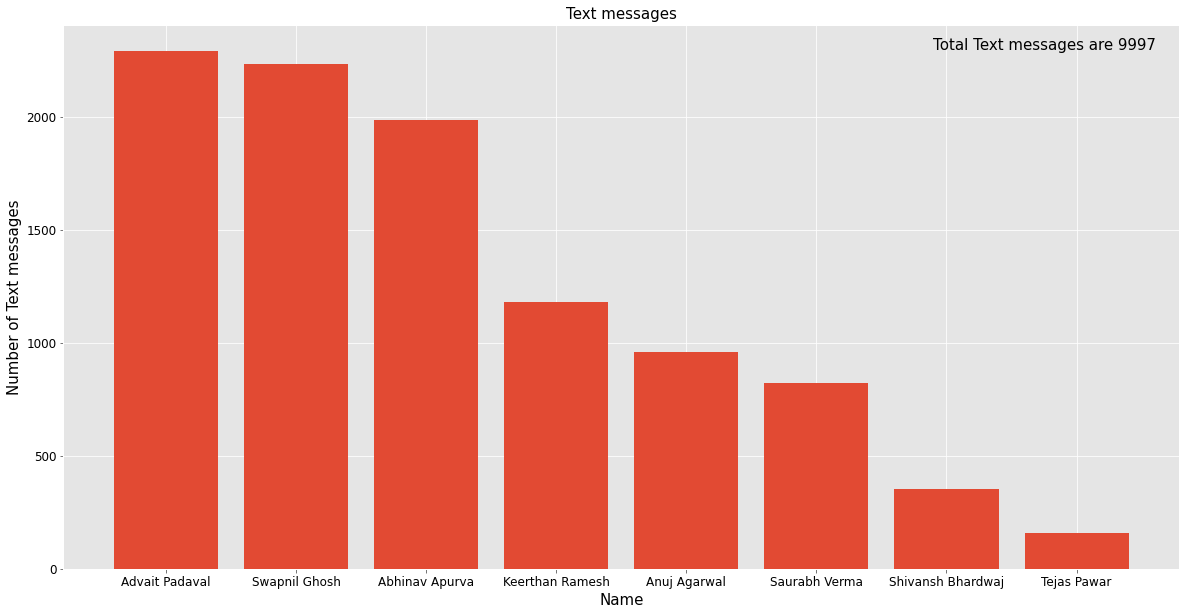

In [ ]:
plt.bar(text_count.Name,text_count.Count)
plt.title('Text messages',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Name',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)
plt.text(5.9, 2300, 'Total Text messages are '+str(len(df_text_1)), color = 'black', fontsize=15)

plt.show()

### Analysing dates

#### Month wise

In [ ]:
# Changing dtype of Date column to datetime
df_text_1.Date = pd.to_datetime(df_text_1.Date)
img.Date = pd.to_datetime(img.Date)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
df_text_1['Month'] = pd.DatetimeIndex(df_text_1['Date']).month
img['Month'] = pd.DatetimeIndex(img['Date']).month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
month_count_text = pd.DataFrame(df_text_1.Month.value_counts()).reset_index().set_axis(["Month", "Count"], axis=1)
month_count_media = pd.DataFrame(img.Month.value_counts()).reset_index().set_axis(["Month", "Count"], axis=1)

2021-07-07 13:10:36,477 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:36,480 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


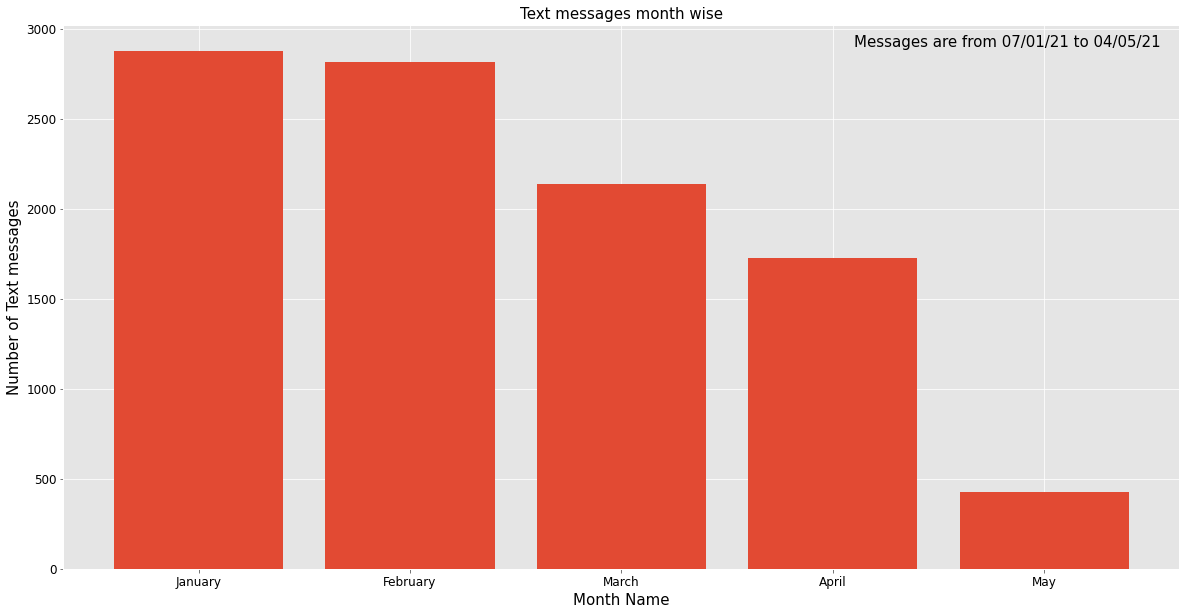

In [ ]:
plt.bar(['January', 'February', 'March', 'April', 'May'],month_count_text.Count)
plt.title('Text messages month wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month Name',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)
plt.text(3.1, 2900, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:36,740 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:36,744 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


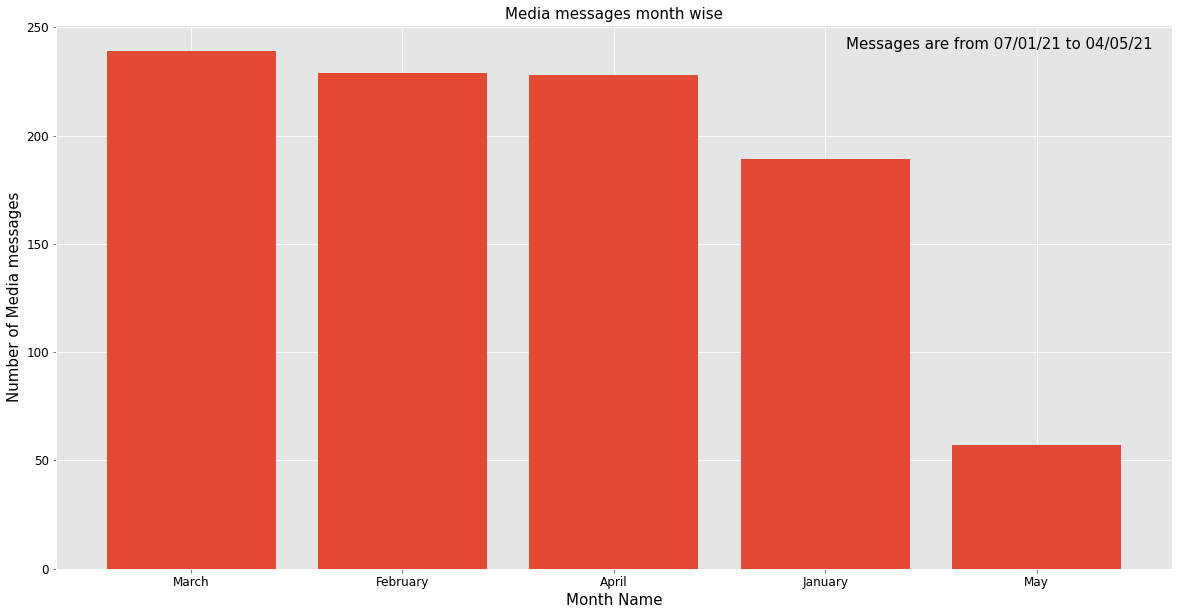

In [ ]:
plt.bar(['March', 'February', 'April', 'January', 'May'],month_count_media.Count)
plt.title('Media messages month wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month Name',color = 'black', fontsize=15)
plt.ylabel('Number of Media messages',color = 'black', fontsize=15)
plt.text(3.1, 240, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

#### Day wise

In [ ]:
day_count_text = pd.DataFrame(df_text_1.Date.value_counts()).reset_index().set_axis(["Date", "Count"], axis=1)
day_count_media = pd.DataFrame(img.Date.value_counts()).reset_index().set_axis(["Date", "Count"], axis=1)

2021-07-07 13:10:37,015 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:37,019 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


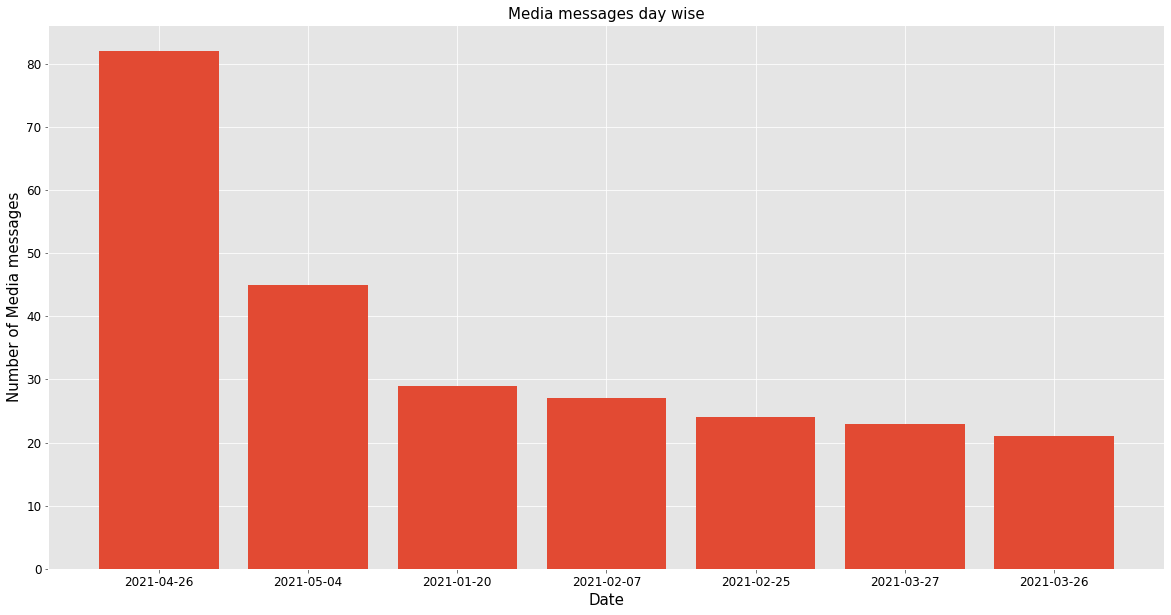

In [ ]:
plt.bar([str(x).replace(' 00:00:00','') for x in day_count_media.Date.head(7)],day_count_media.Count.head(7))
plt.title('Media messages day wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of Media messages',color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:37,316 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:37,321 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


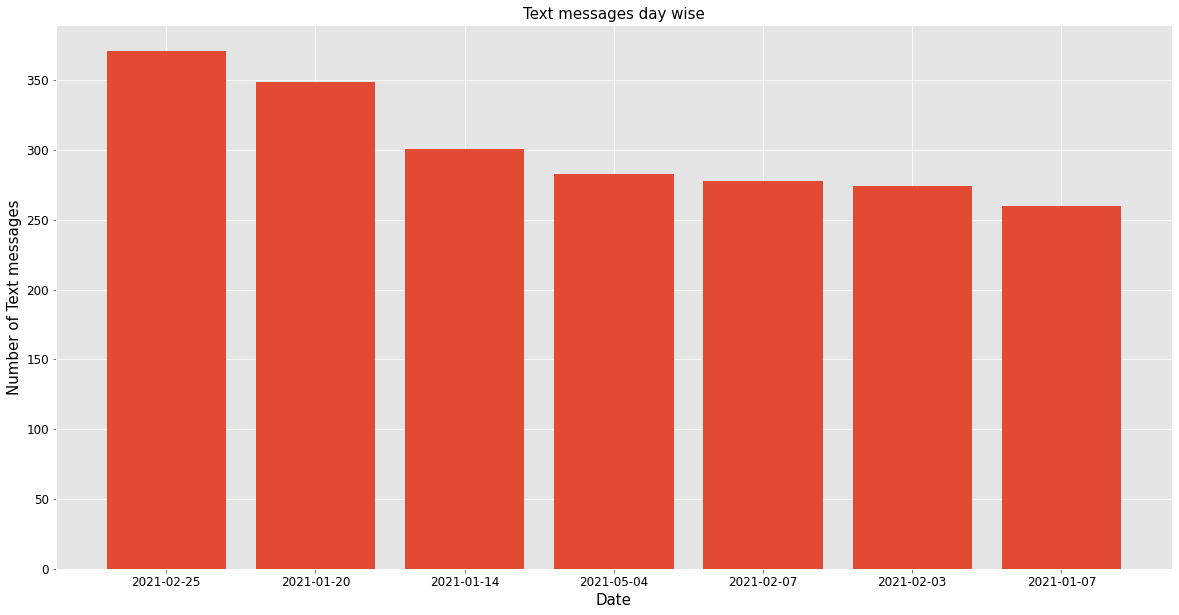

In [ ]:
plt.bar([str(x).replace(' 00:00:00','') for x in day_count_text.Date.head(7)],day_count_text.Count.head(7))
plt.title('Text messages day wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

#### Time wise

In [ ]:
# Adding time column
df_text_1['Hour'] = pd.to_datetime(df_text_1.Time).apply(lambda x: x.hour)
img['Hour'] = pd.to_datetime(img.Time).apply(lambda x: x.hour)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
hour_count_text = pd.DataFrame(df_text_1.Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)
hour_count_media = pd.DataFrame(img.Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)

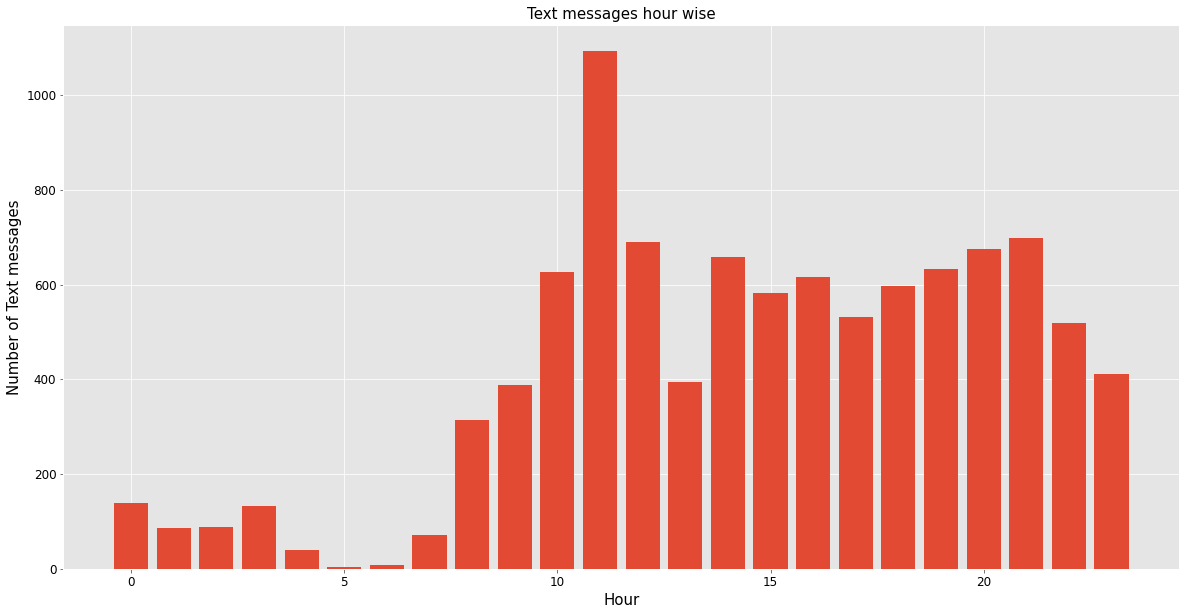

In [ ]:
plt.bar(hour_count_text.sort_values(by='Hour').Hour,hour_count_text.sort_values(by='Hour').Count)
plt.title('Text messages hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

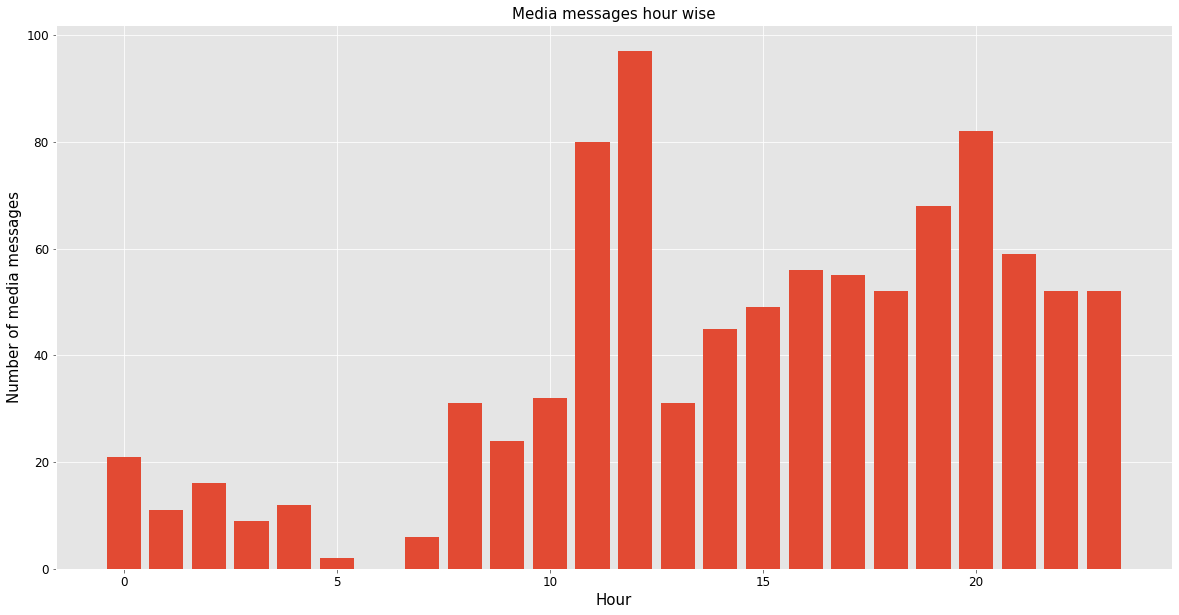

In [ ]:
plt.bar(hour_count_media.sort_values(by='Hour').Hour,hour_count_media.sort_values(by='Hour').Count)
plt.title('Media messages hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

### Analysing months person wise

#### Abhinav

2021-07-07 13:10:38,428 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:38,432 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


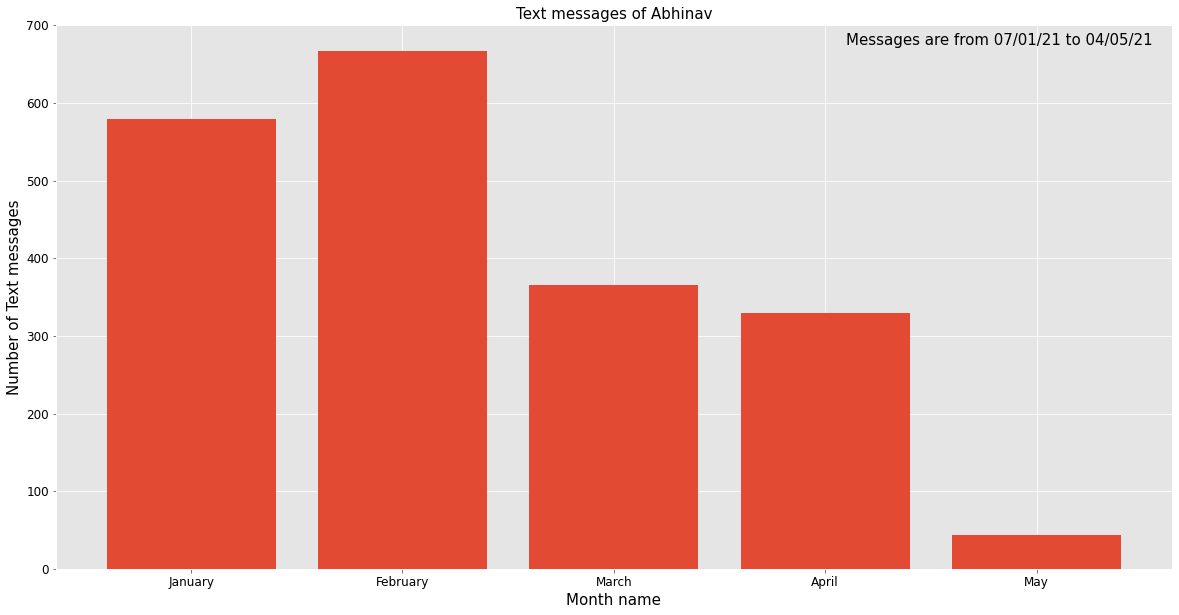

In [ ]:
df_abhinav_text = df_text_1[df_text_1.Name=='Abhinav Apurva'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_abhinav_text.Message)
plt.title('Text messages of Abhinav',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)
plt.text(3.1, 675, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:38,689 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:38,692 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


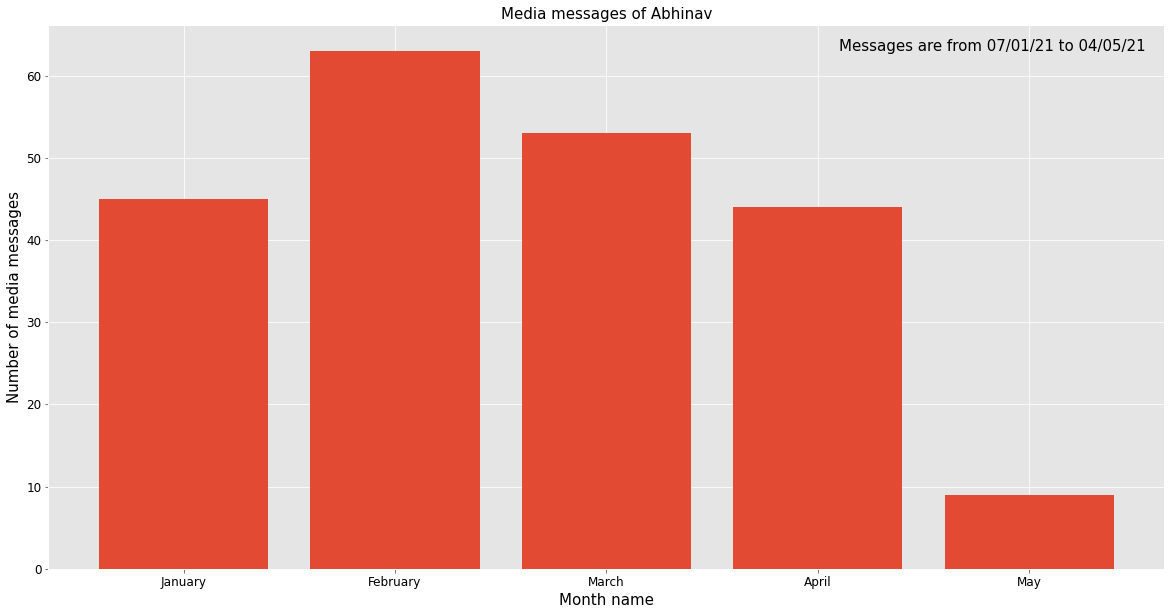

In [ ]:
df_abhinav_media = img[img.Name=='Abhinav Apurva'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_abhinav_media.Message)
plt.title('Media messages of Abhinav',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)
plt.text(3.1, 63, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

#### Advait

2021-07-07 13:10:38,959 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:38,966 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


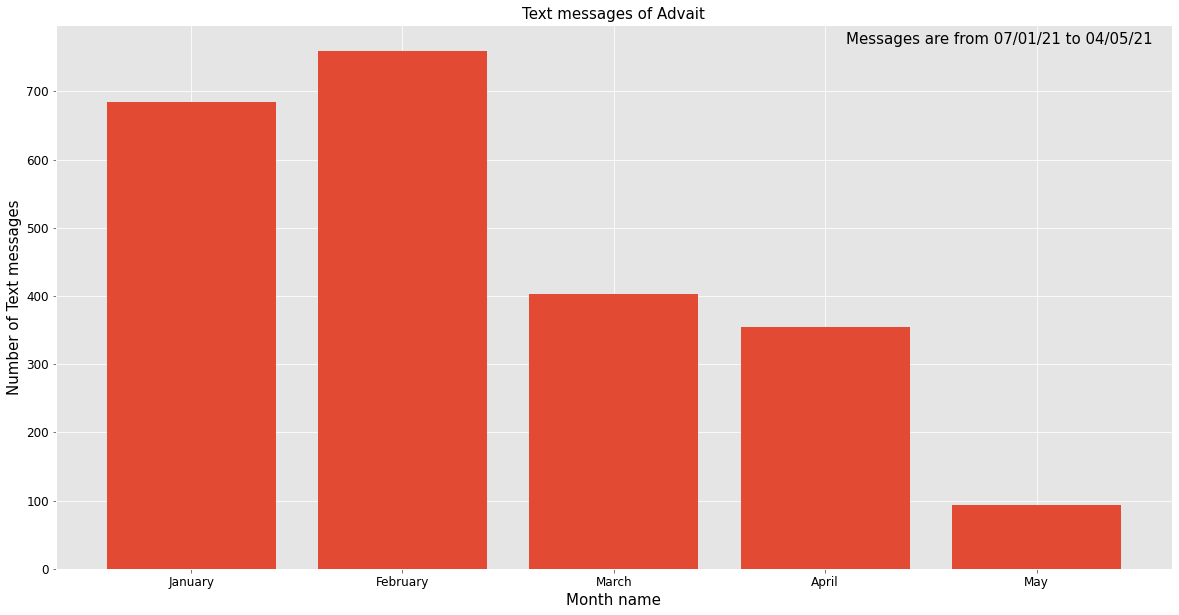

In [ ]:
df_advait_text = df_text_1[df_text_1.Name=='Advait Padaval'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_advait_text.Message)
plt.title('Text messages of Advait',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)
plt.text(3.1, 770, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:39,251 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:39,255 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


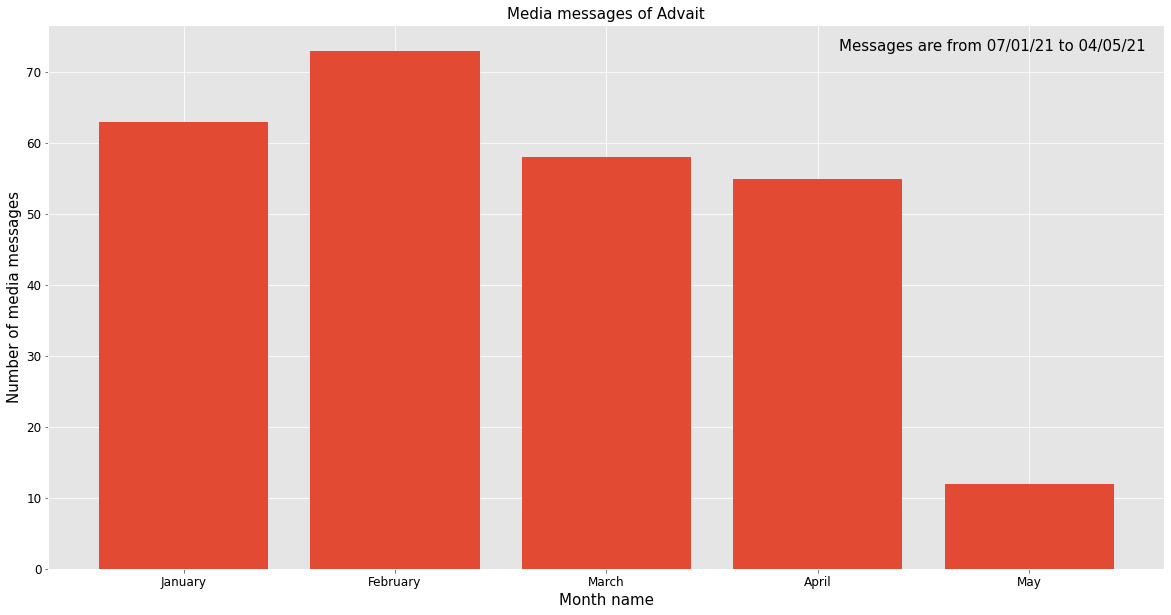

In [ ]:
df_advait_media = img[img.Name=='Advait Padaval'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_advait_media.Message)
plt.title('Media messages of Advait',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)
plt.text(3.1, 73, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

#### Anuj

2021-07-07 13:10:39,505 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:39,508 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


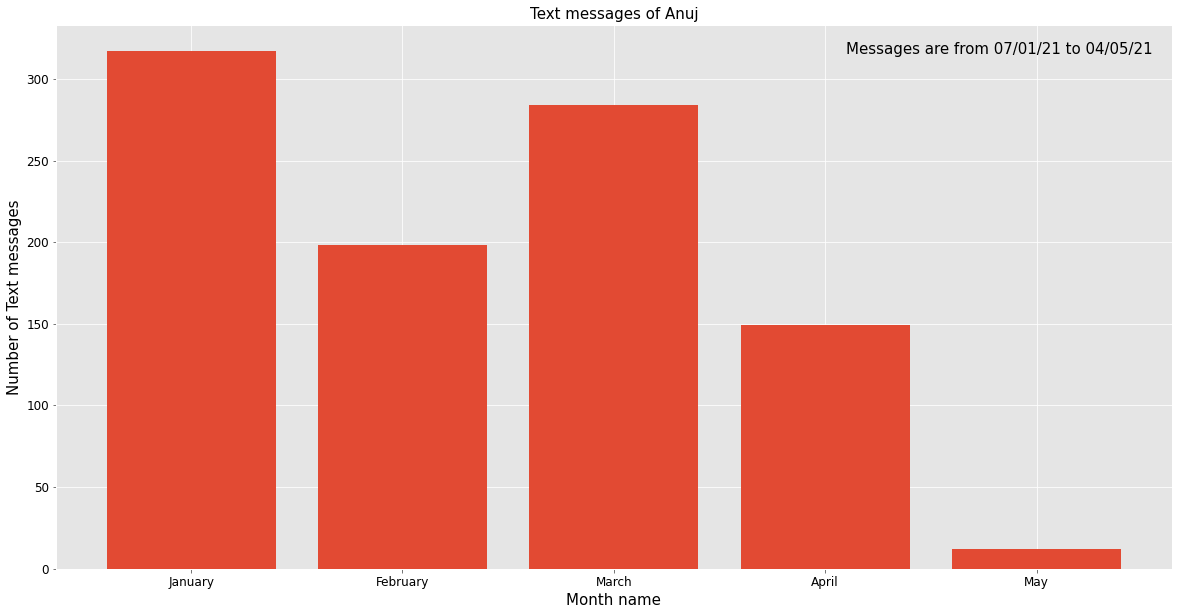

In [ ]:
df_anuj_text = df_text_1[df_text_1.Name=='Anuj Agarwal'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_anuj_text.Message)
plt.title('Text messages of Anuj',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)
plt.text(3.1, 315, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:39,904 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:39,908 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


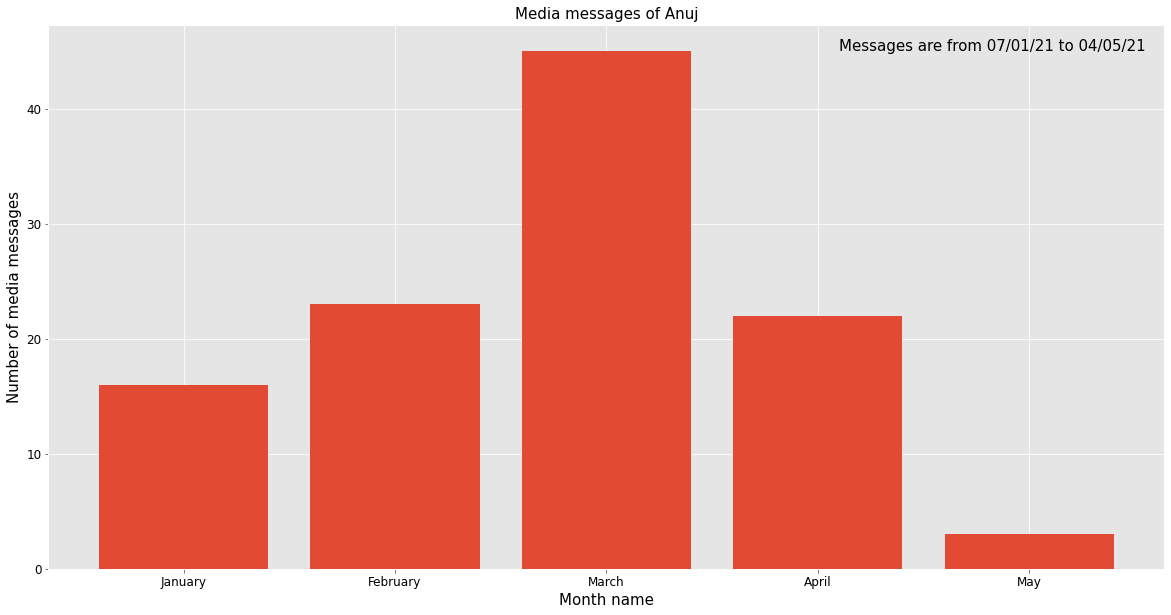

In [ ]:
df_anuj_media = img[img.Name=='Anuj Agarwal'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_anuj_media.Message)
plt.title('Media messages of Anuj',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)
plt.text(3.1, 45, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

#### Keerthan

2021-07-07 13:10:40,149 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:40,153 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


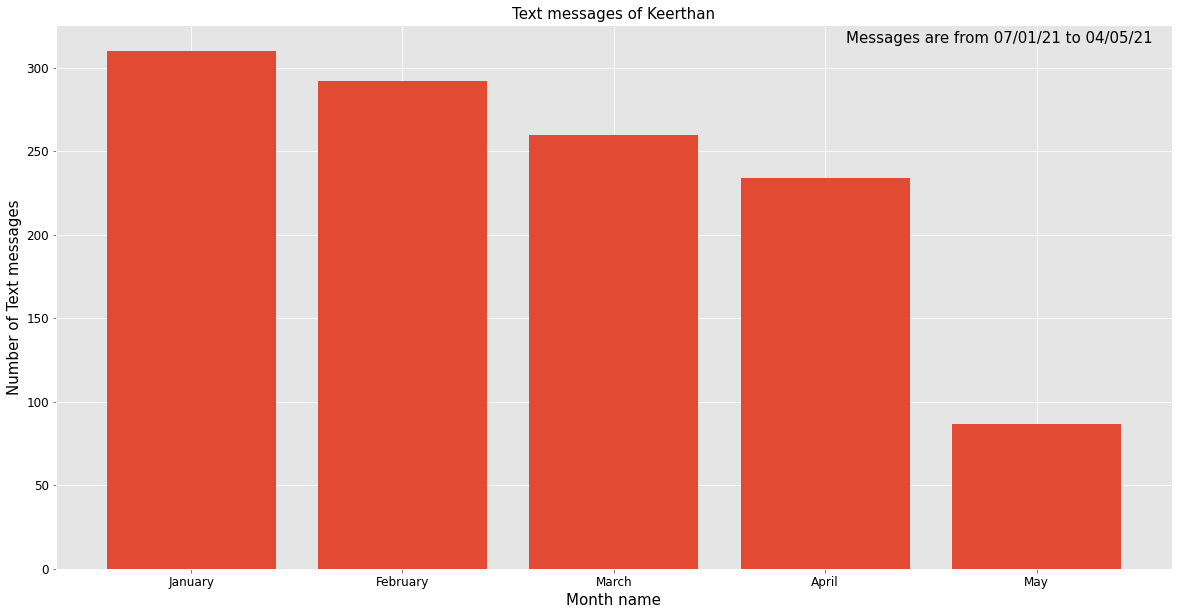

In [ ]:
df_keerthan_text = df_text_1[df_text_1.Name=='Keerthan Ramesh'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_keerthan_text.Message)
plt.title('Text messages of Keerthan',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)
plt.text(3.1, 315, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:40,433 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:40,437 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


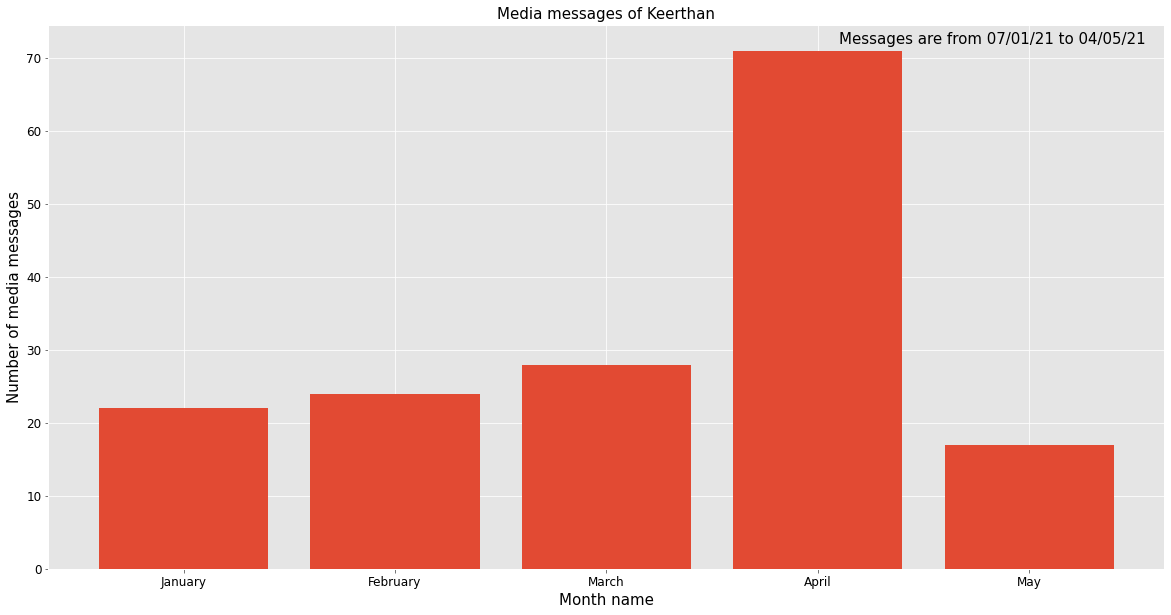

In [ ]:
df_keerthan_media = img[img.Name=='Keerthan Ramesh'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_keerthan_media.Message)
plt.title('Media messages of Keerthan',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)
plt.text(3.1, 72, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

#### Swapnil

2021-07-07 13:10:40,708 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:40,711 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


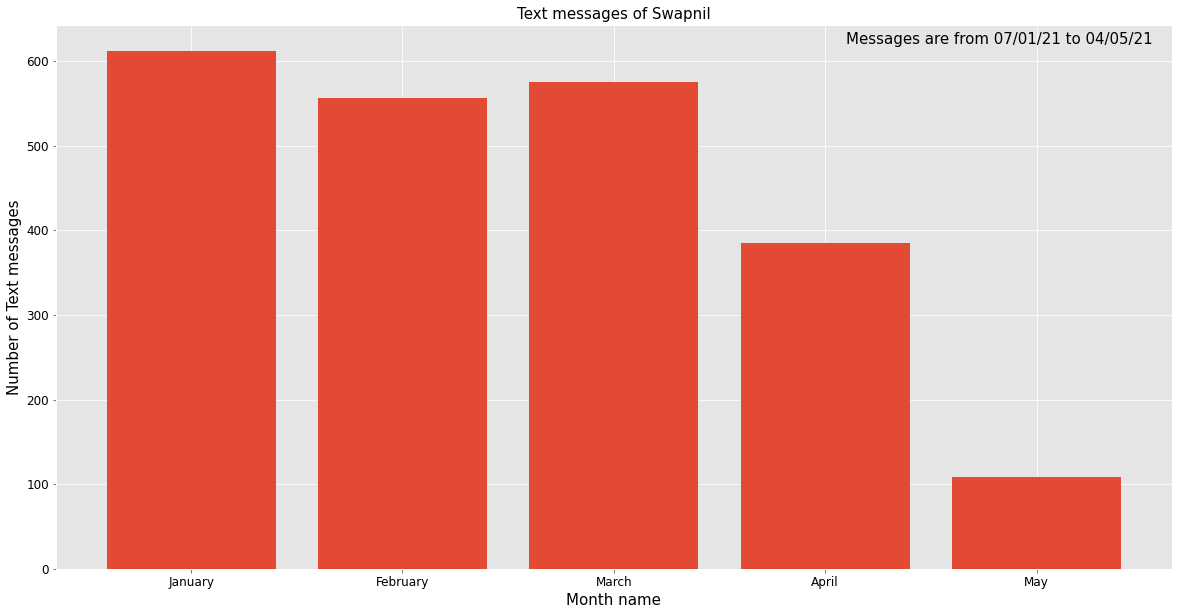

In [ ]:
df_swapnil_text = df_text_1[df_text_1.Name=='Swapnil Ghosh'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_swapnil_text.Message)
plt.title('Text messages of Swapnil',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)
plt.text(3.1, 620, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:41,005 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:41,008 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


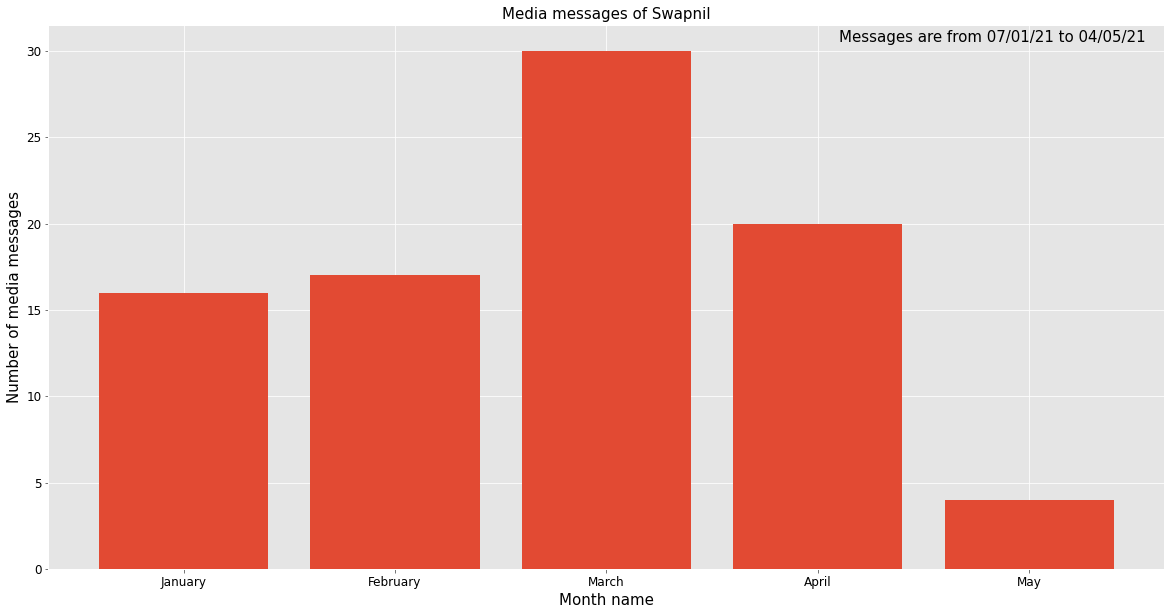

In [ ]:
df_swapnil_media = img[img.Name=='Swapnil Ghosh'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_swapnil_media.Message)
plt.title('Media messages of Swapnil',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)
plt.text(3.1, 30.5, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

#### Saurabh

2021-07-07 13:10:41,259 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:41,263 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


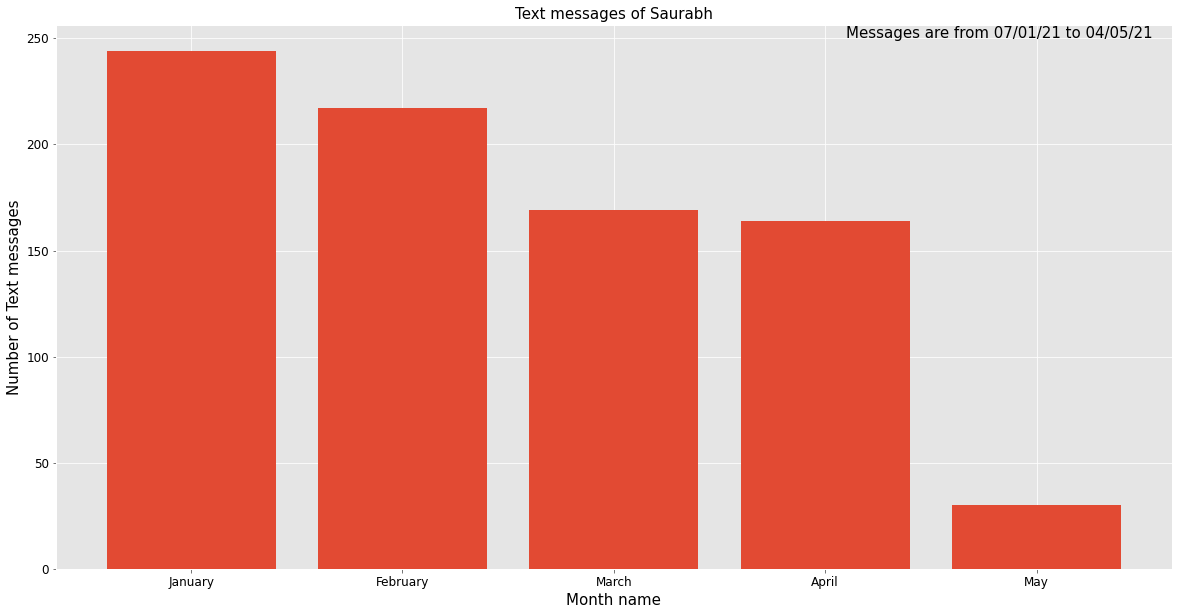

In [ ]:
df_saurabh_text = df_text_1[df_text_1.Name=='Saurabh Verma'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_saurabh_text.Message)
plt.title('Text messages of Saurabh',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)
plt.text(3.1, 250, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:41,521 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:41,524 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


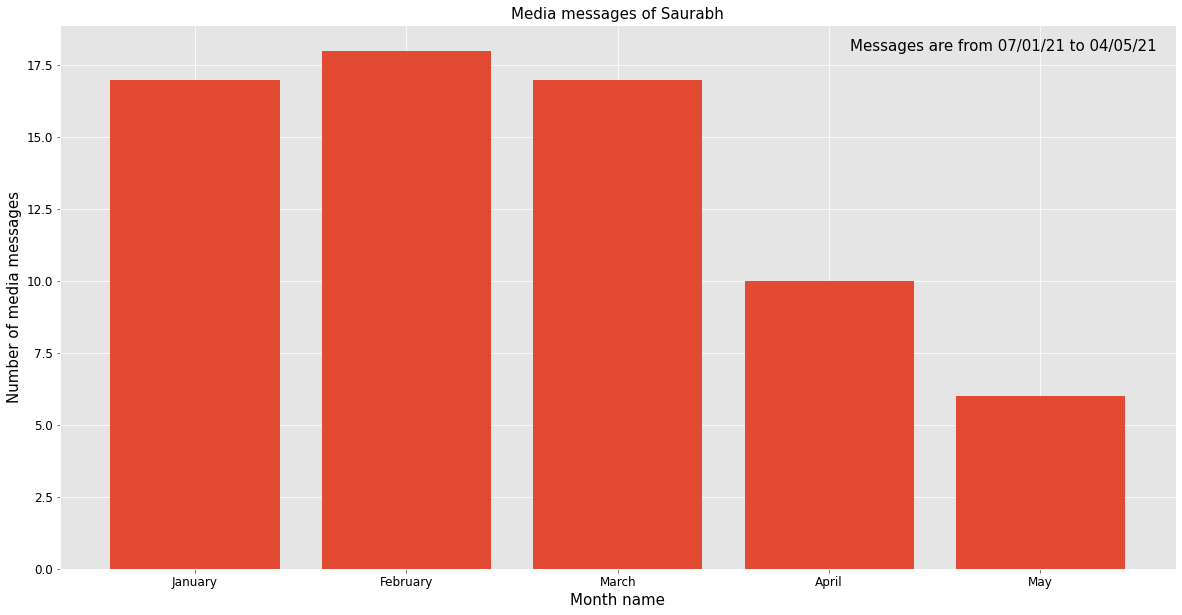

In [ ]:
df_saurabh_media = img[img.Name=='Saurabh Verma'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_saurabh_media.Message)
plt.title('Media messages of Saurabh',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)
plt.text(3.1, 18, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

#### Shivansh

2021-07-07 13:10:41,804 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:41,808 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


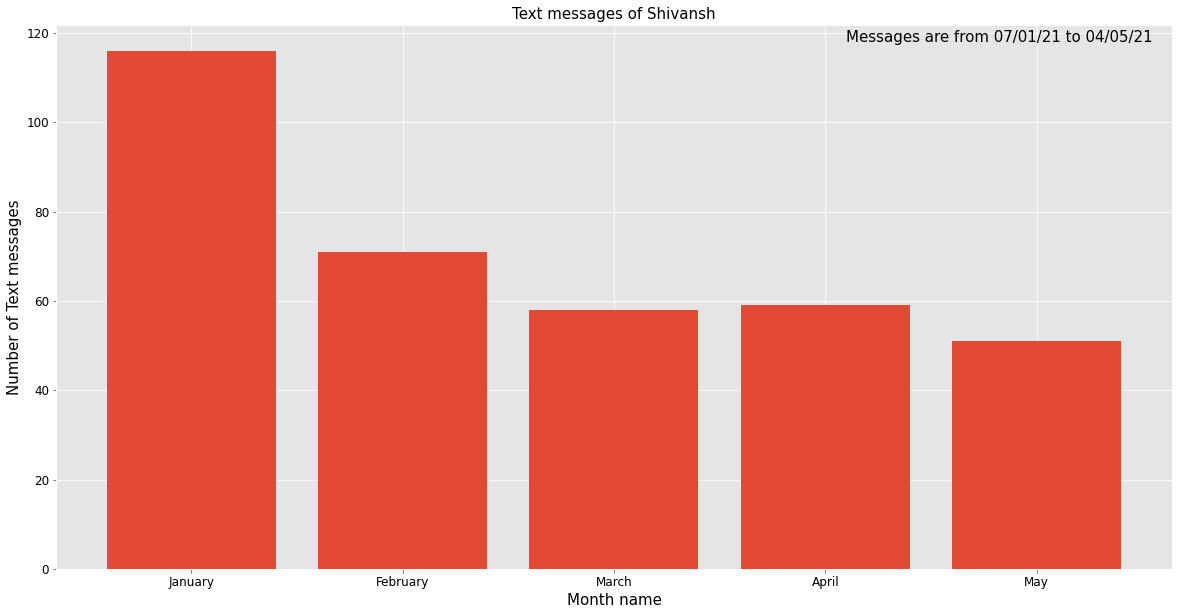

In [ ]:
df_shivansh_text = df_text_1[df_text_1.Name=='Shivansh Bhardwaj'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_shivansh_text.Message)
plt.title('Text messages of Shivansh',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)
plt.text(3.1, 118, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:42,060 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:42,063 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


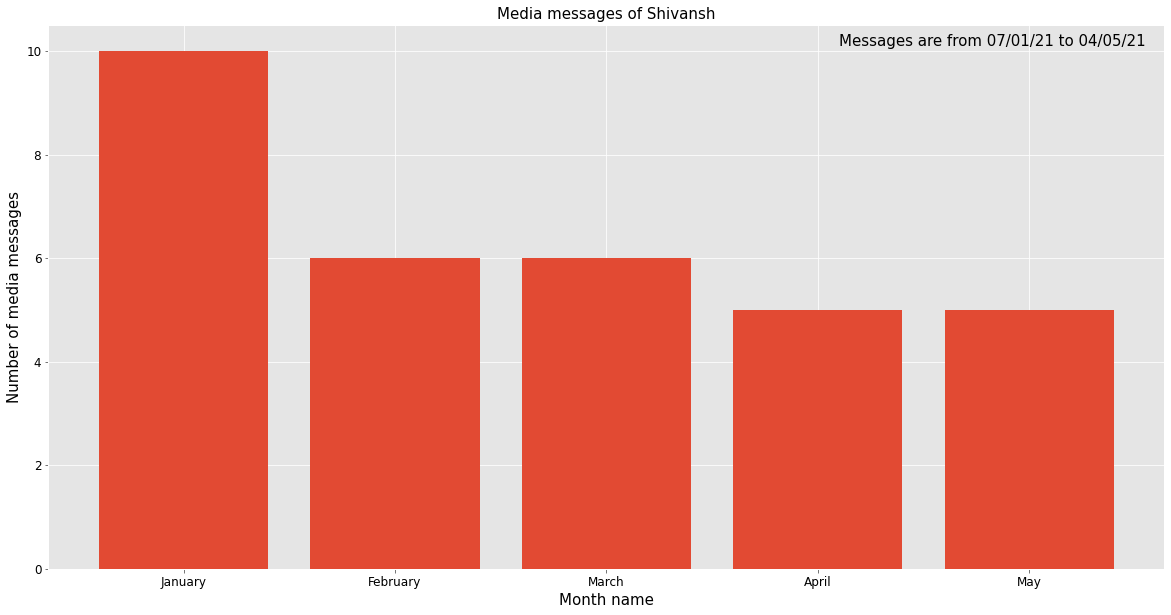

In [ ]:
df_shivansh_media = img[img.Name=='Shivansh Bhardwaj'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_shivansh_media.Message)
plt.title('Media messages of Shivansh',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)
plt.text(3.1, 10.1, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

#### Tejas

2021-07-07 13:10:42,328 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:42,331 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


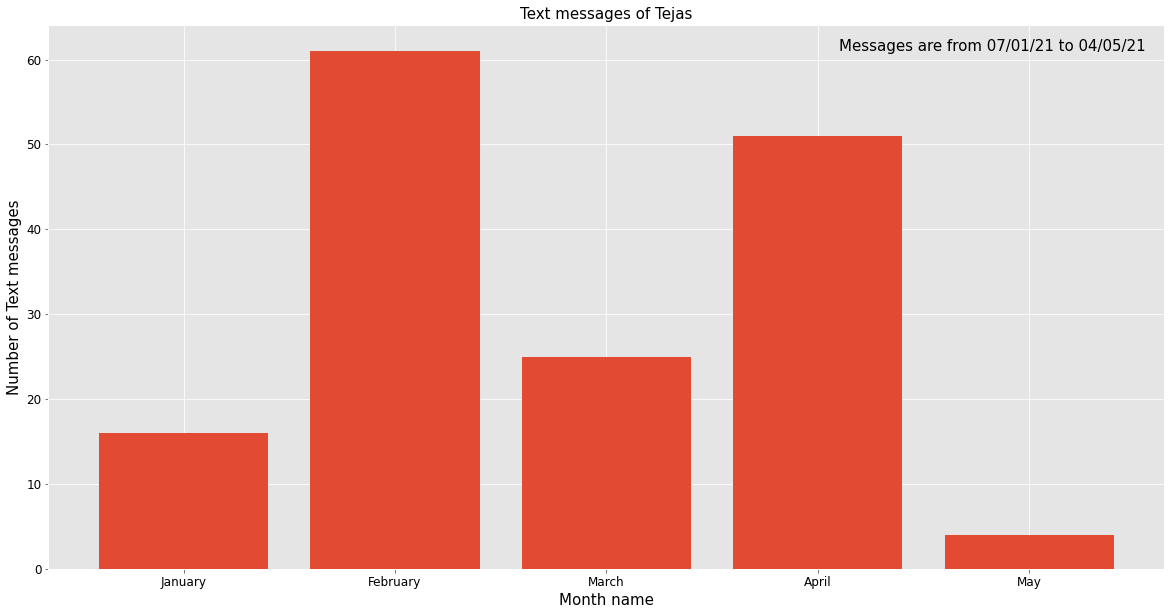

In [ ]:
df_tejas_text = df_text_1[df_text_1.Name=='Tejas Pawar'].groupby('Month').count()

plt.bar(['January', 'February', 'March', 'April', 'May'],df_tejas_text.Message)
plt.title('Text messages of Tejas',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)
plt.text(3.1, 61, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:42,610 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:42,613 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


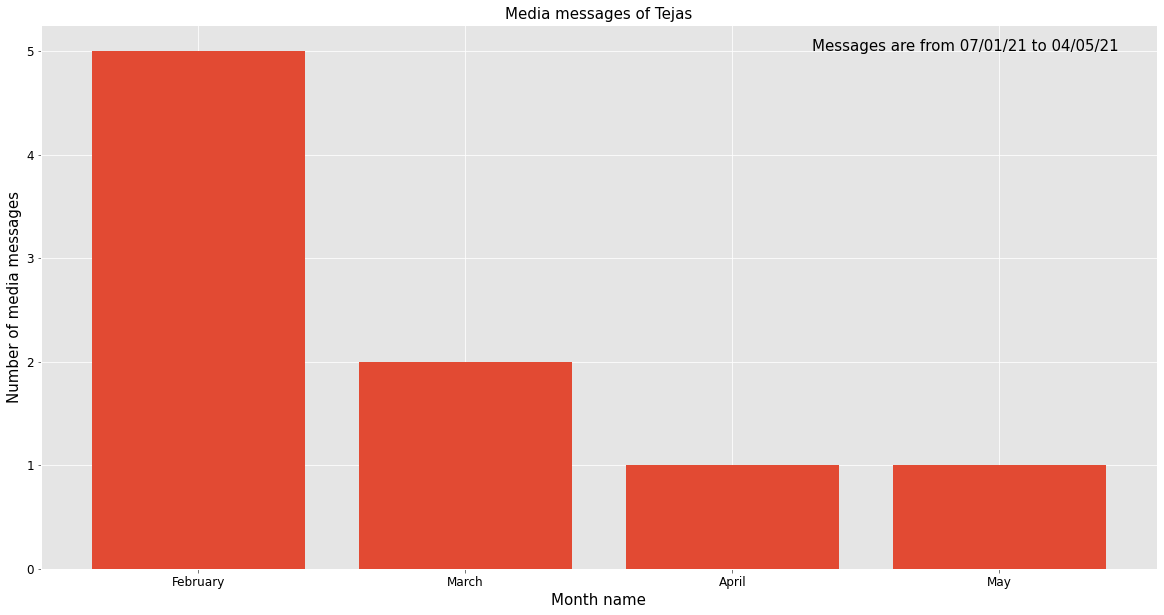

In [ ]:
df_tejas_media = img[img.Name=='Tejas Pawar'].groupby('Month').count()

plt.bar(['February', 'March', 'April', 'May'],df_tejas_media.Message)
plt.title('Media messages of Tejas',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Month name',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)
plt.text(2.3, 5, 'Messages are from 07/01/21 to 04/05/21', color = 'black', fontsize=15)

plt.show()

### Analysing days person wise

#### Abhinav

2021-07-07 13:10:42,875 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:42,879 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


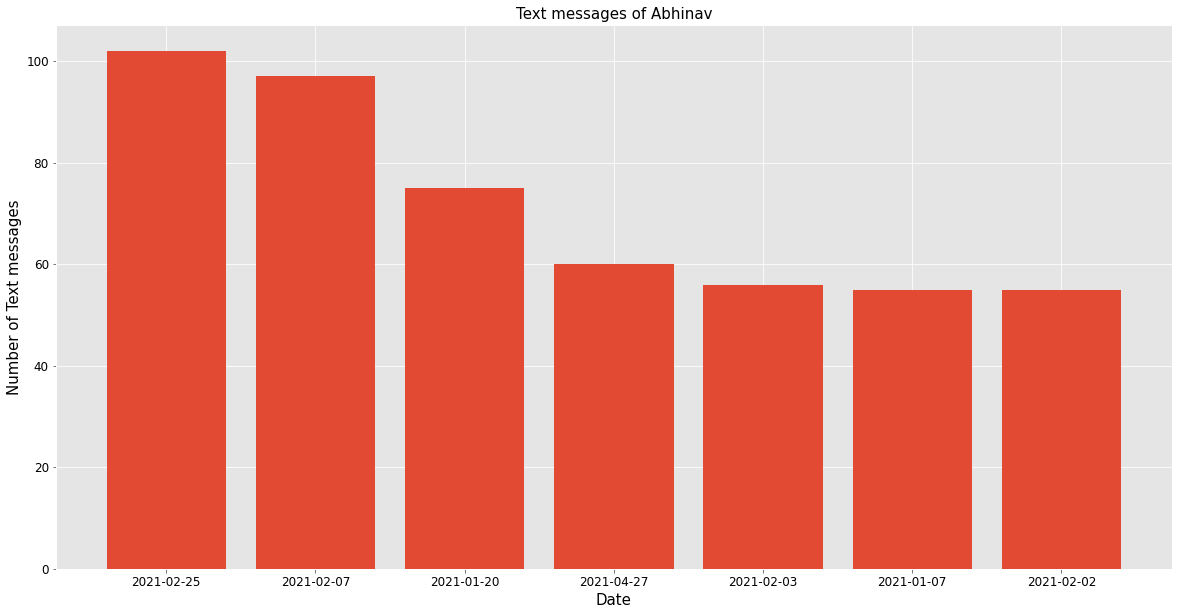

In [ ]:
df_abhinav_text =  df_text_1[df_text_1.Name=='Abhinav Apurva'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_abhinav_text.index],df_abhinav_text)
plt.title('Text messages of Abhinav',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:43,149 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:43,153 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


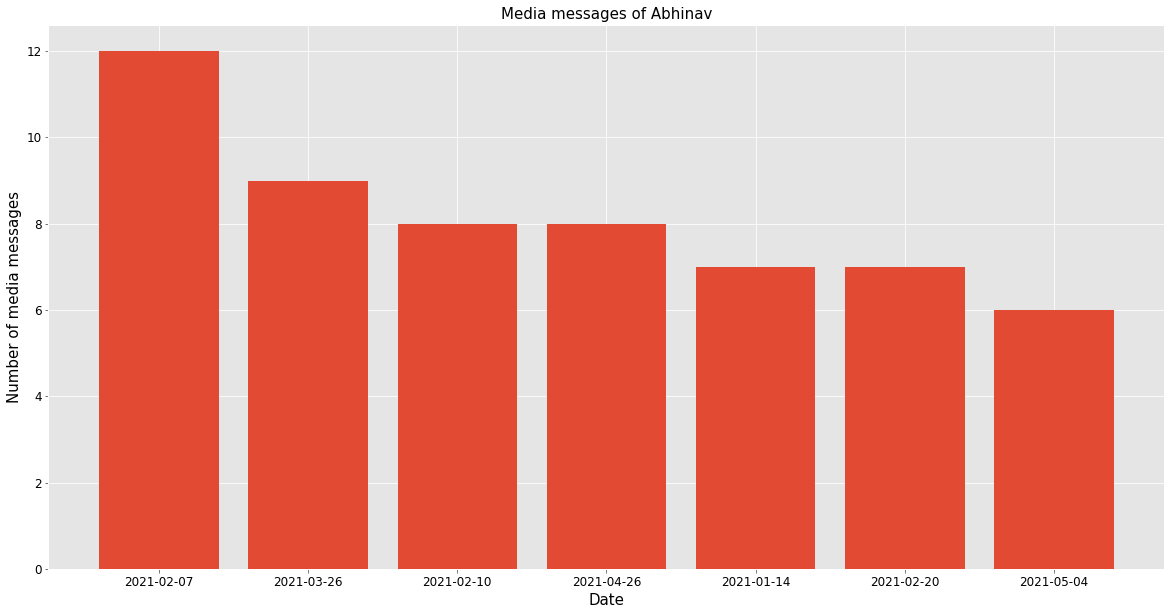

In [ ]:
df_abhinav_media = img[img.Name=='Abhinav Apurva'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_abhinav_media.index],df_abhinav_media)
plt.title('Media messages of Abhinav',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Advait

2021-07-07 13:10:43,415 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:43,419 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


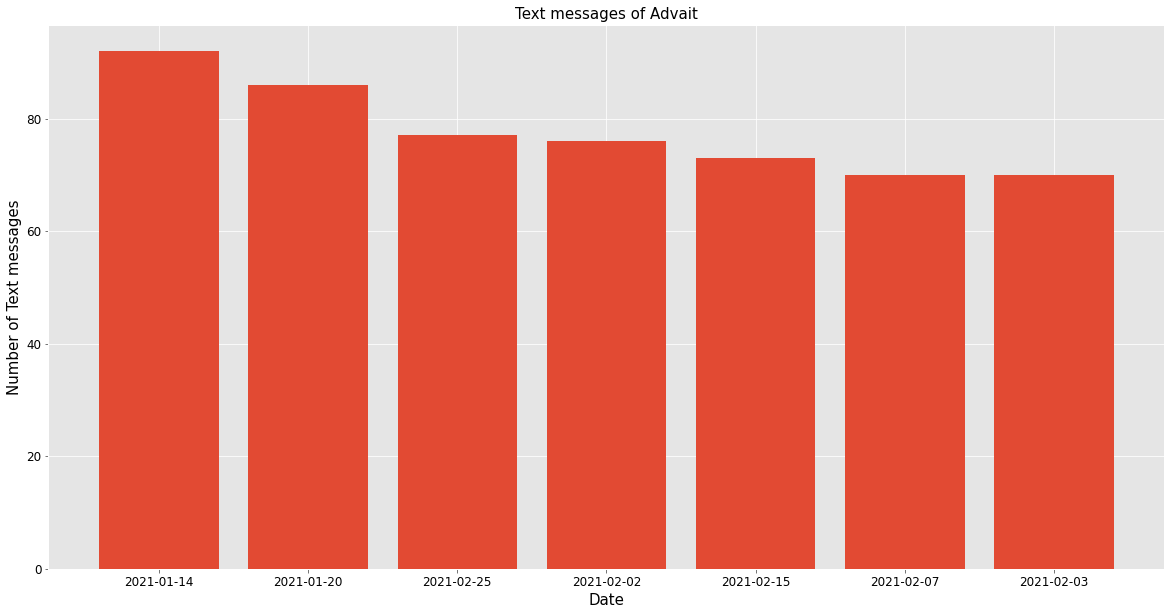

In [ ]:
df_advait_text =  df_text_1[df_text_1.Name=='Advait Padaval'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_advait_text.index],df_advait_text)
plt.title('Text messages of Advait',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:43,688 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:43,692 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


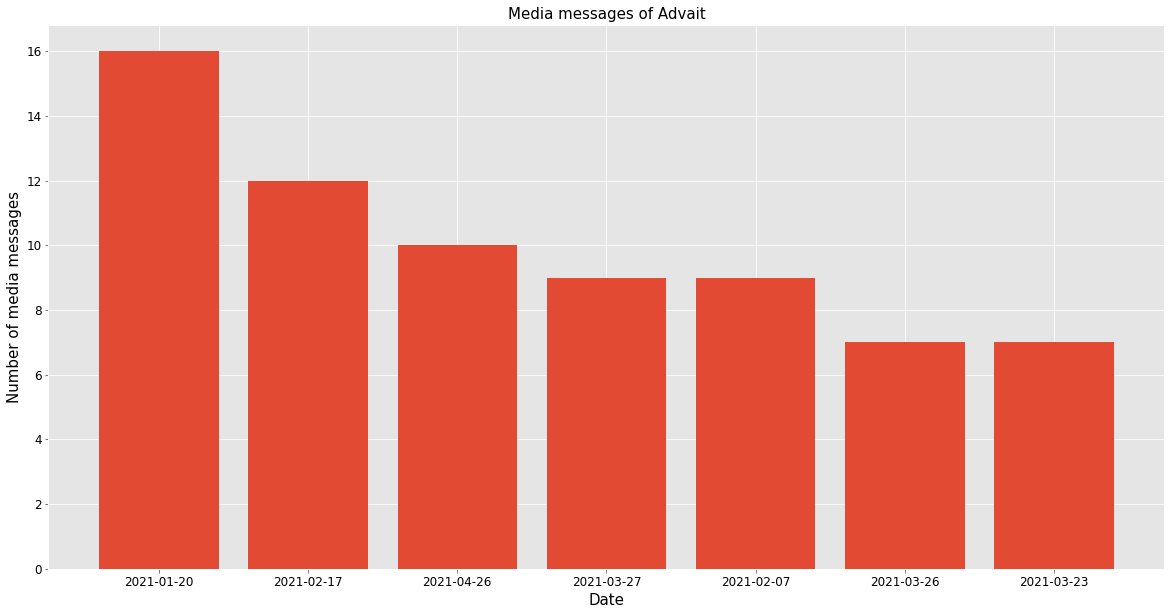

In [ ]:
df_advait_media = img[img.Name=='Advait Padaval'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_advait_media.index],df_advait_media)
plt.title('Media messages of Advait',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Anuj

2021-07-07 13:10:44,096 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:44,100 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


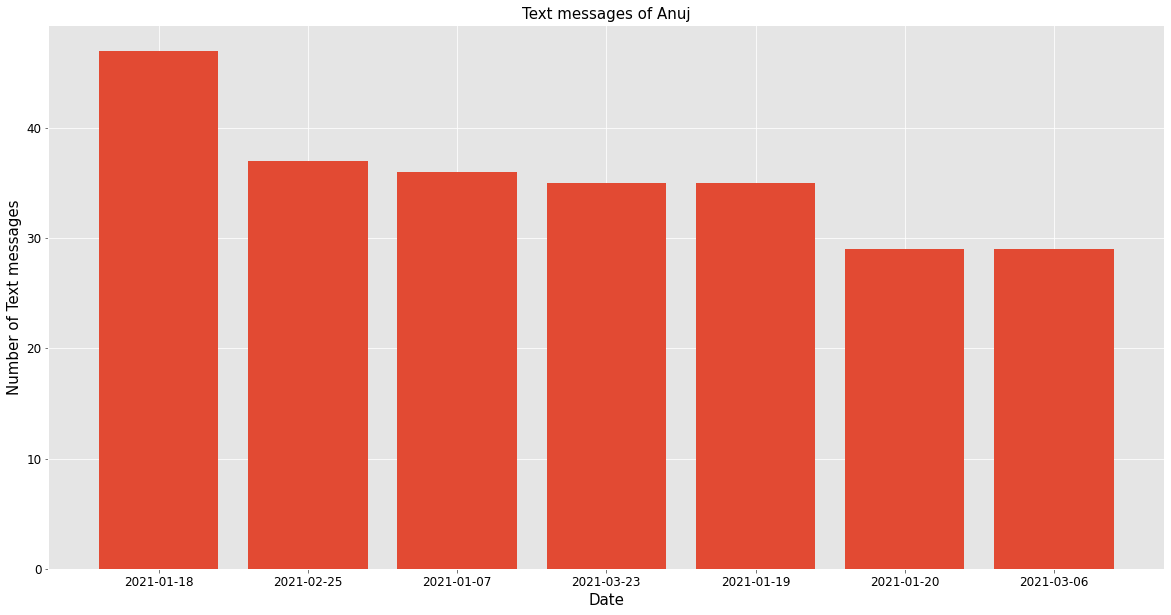

In [ ]:
df_anuj_text =  df_text_1[df_text_1.Name=='Anuj Agarwal'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_anuj_text.index],df_anuj_text)
plt.title('Text messages of Anuj',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:44,358 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:44,361 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


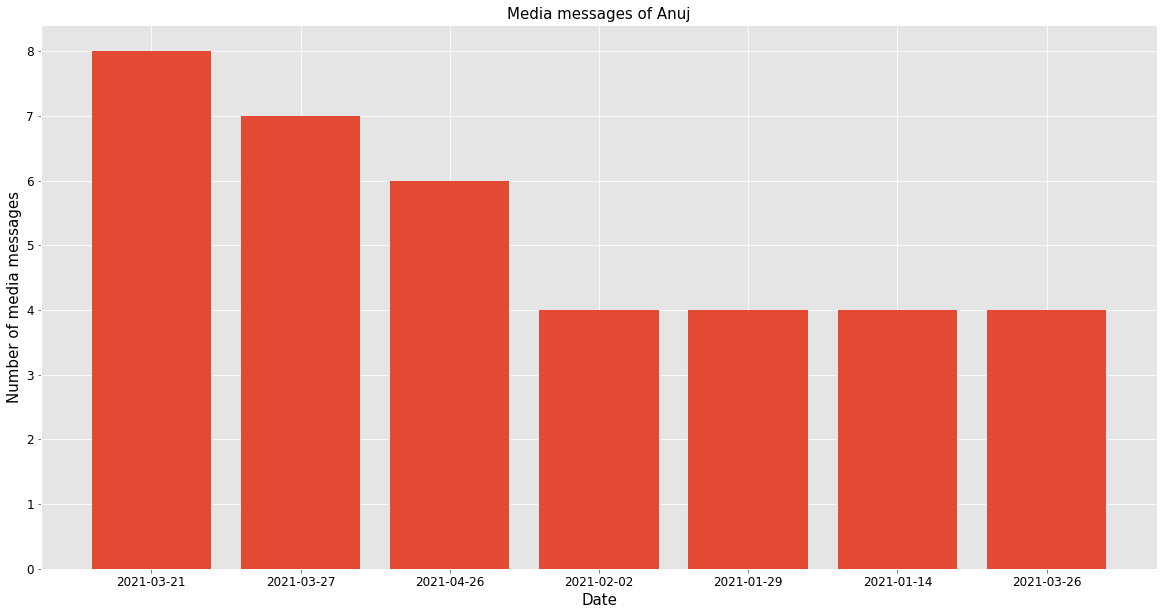

In [ ]:
df_anuj_media = img[img.Name=='Anuj Agarwal'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_anuj_media.index],df_anuj_media)
plt.title('Media messages of Anuj',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Keerthan

2021-07-07 13:10:44,636 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:44,640 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


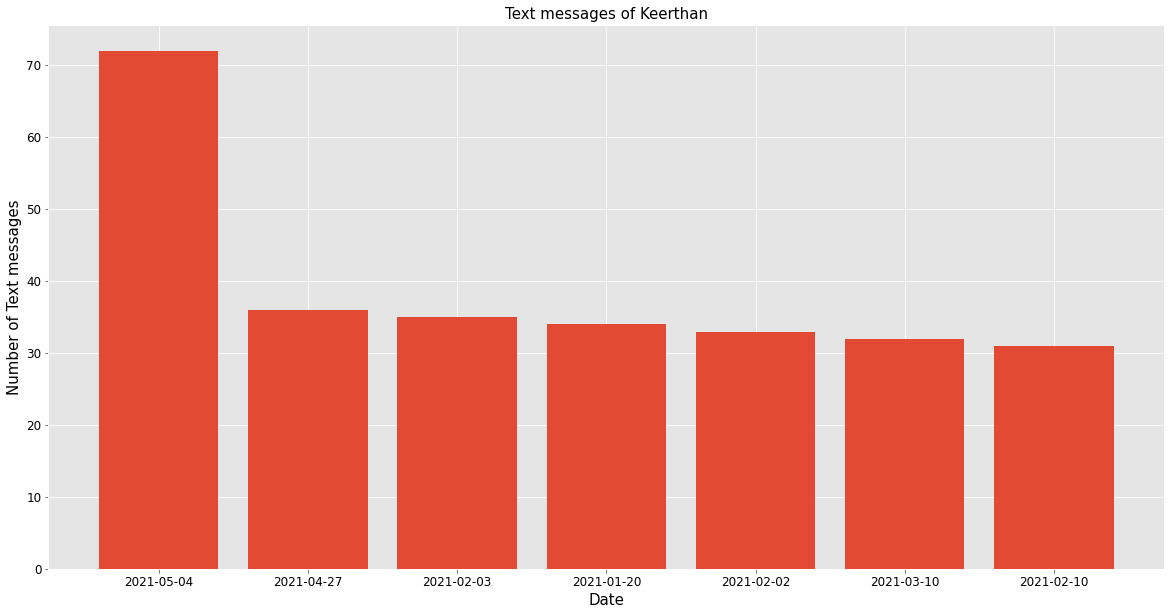

In [ ]:
df_keerthan_text =  df_text_1[df_text_1.Name=='Keerthan Ramesh'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_keerthan_text.index],df_keerthan_text)
plt.title('Text messages of Keerthan',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:44,917 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:44,921 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


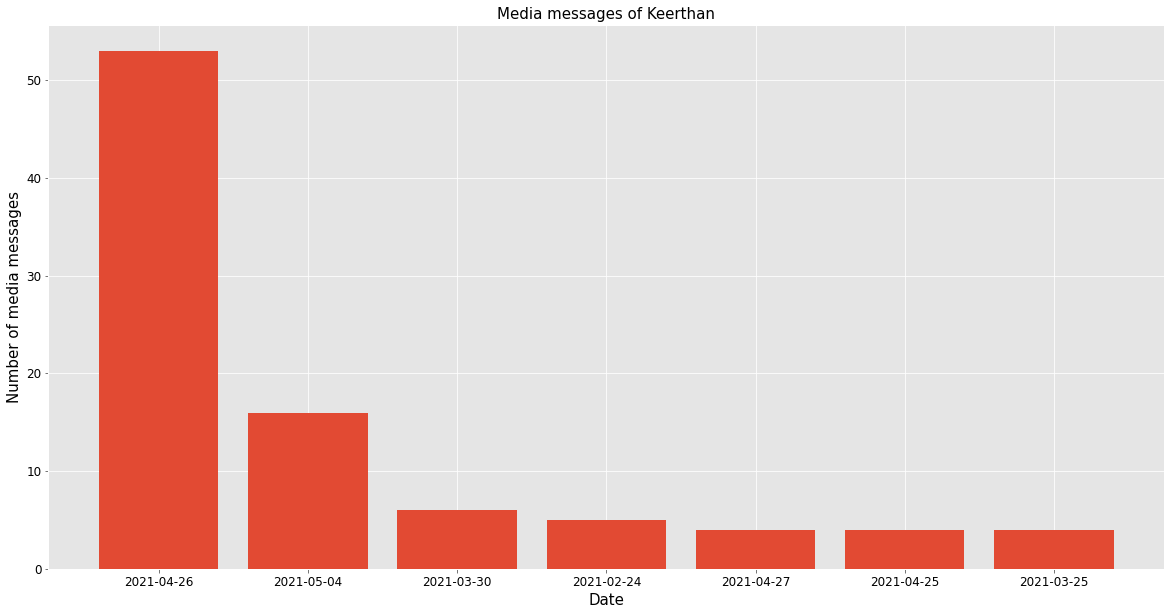

In [ ]:
df_keerthan_media = img[img.Name=='Keerthan Ramesh'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_keerthan_media.index],df_keerthan_media)
plt.title('Media messages of Keerthan',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Swapnil

2021-07-07 13:10:45,189 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:45,193 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


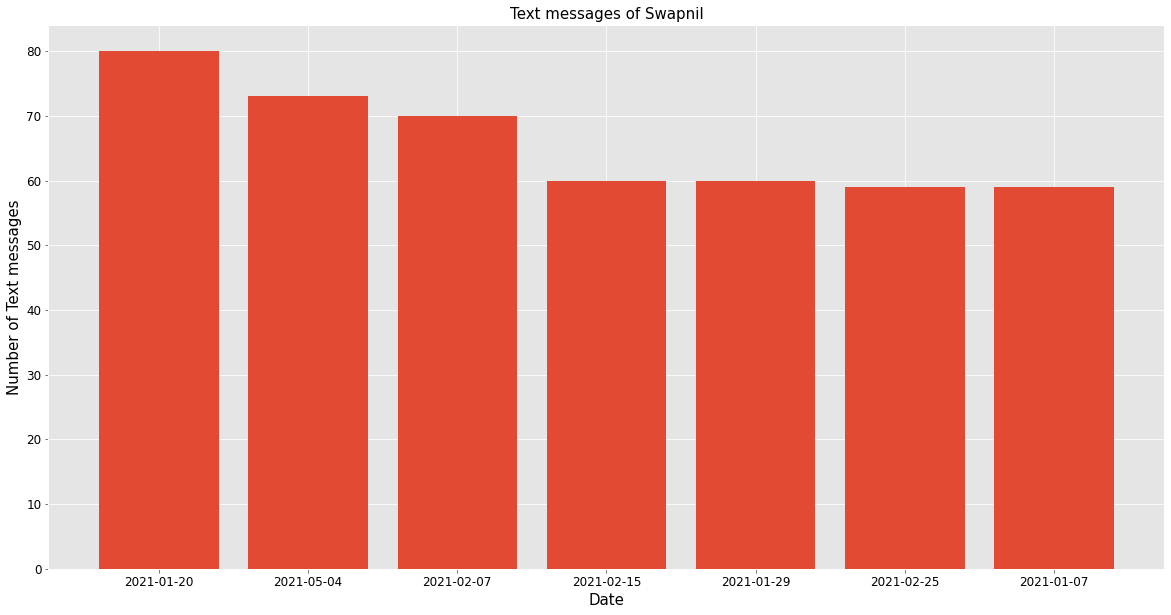

In [ ]:
df_swapnil_text =  df_text_1[df_text_1.Name=='Swapnil Ghosh'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_swapnil_text.index],df_swapnil_text)
plt.title('Text messages of Swapnil',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:45,472 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:45,475 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


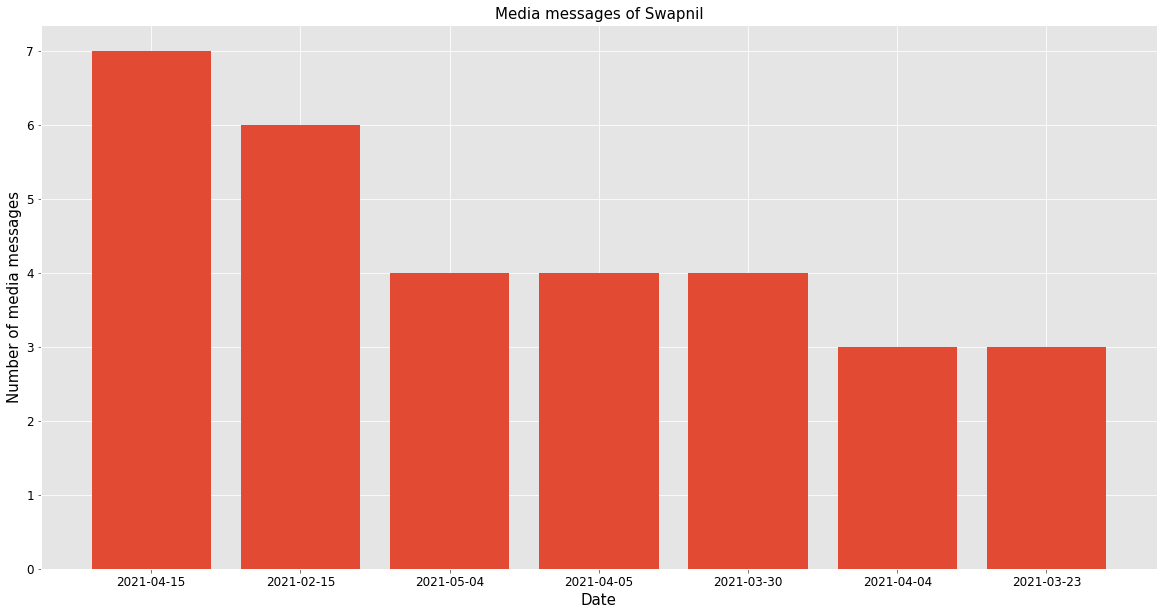

In [ ]:
df_swapnil_media = img[img.Name=='Swapnil Ghosh'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_swapnil_media.index],df_swapnil_media)
plt.title('Media messages of Swapnil',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Saurabh

2021-07-07 13:10:45,766 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:45,770 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


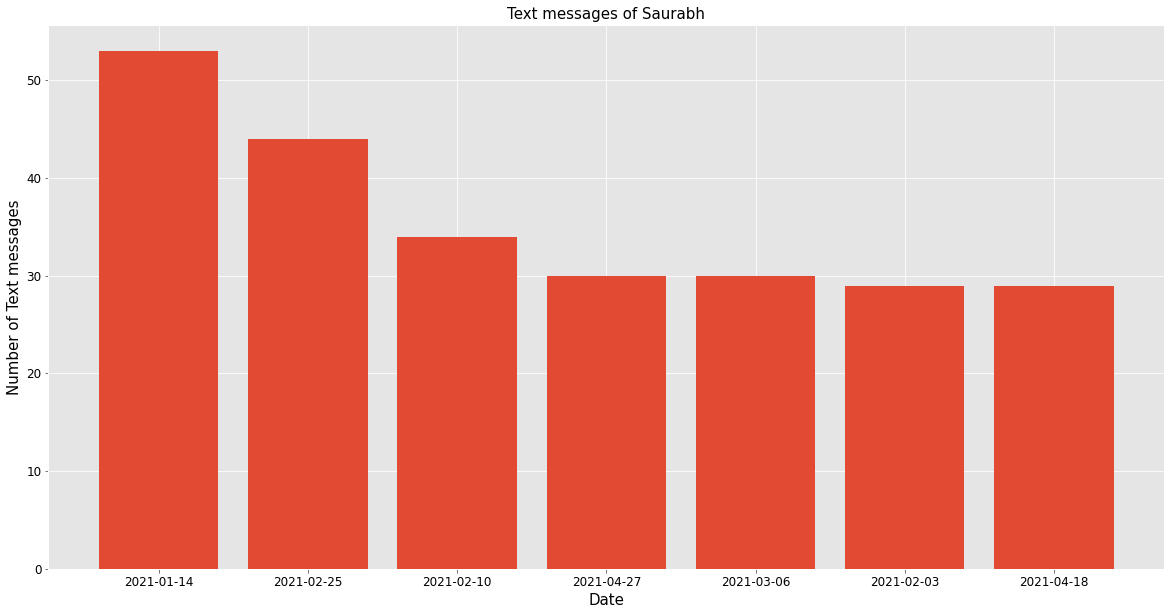

In [ ]:
df_saurabh_text =  df_text_1[df_text_1.Name=='Saurabh Verma'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_saurabh_text.index],df_saurabh_text)
plt.title('Text messages of Saurabh',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:46,039 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:46,042 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


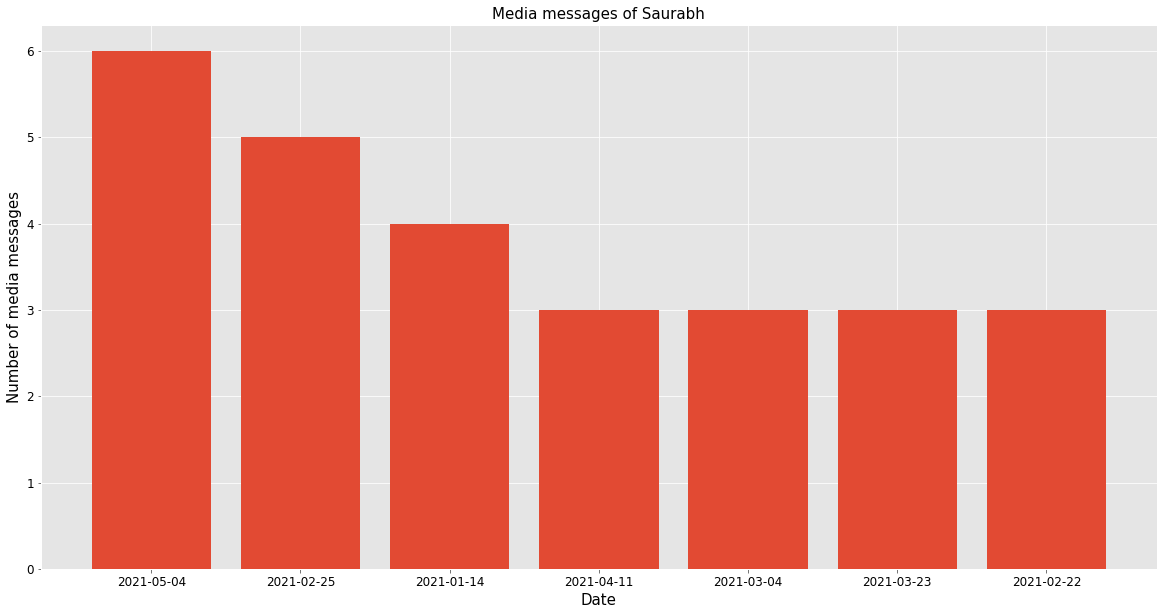

In [ ]:
df_saurabh_media = img[img.Name=='Saurabh Verma'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_saurabh_media.index],df_saurabh_media)
plt.title('Media messages of Saurabh',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Shivansh

2021-07-07 13:10:46,354 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:46,358 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


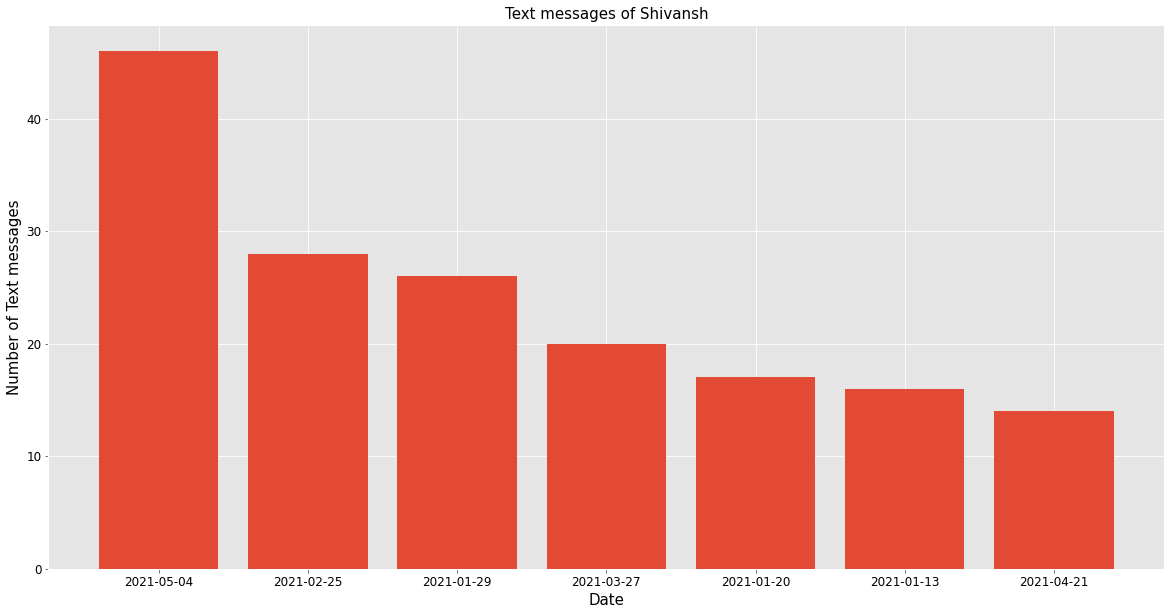

In [ ]:
df_shivansh_text =  df_text_1[df_text_1.Name=='Shivansh Bhardwaj'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_shivansh_text.index],df_shivansh_text)
plt.title('Text messages of Shivansh',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:46,628 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:46,632 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


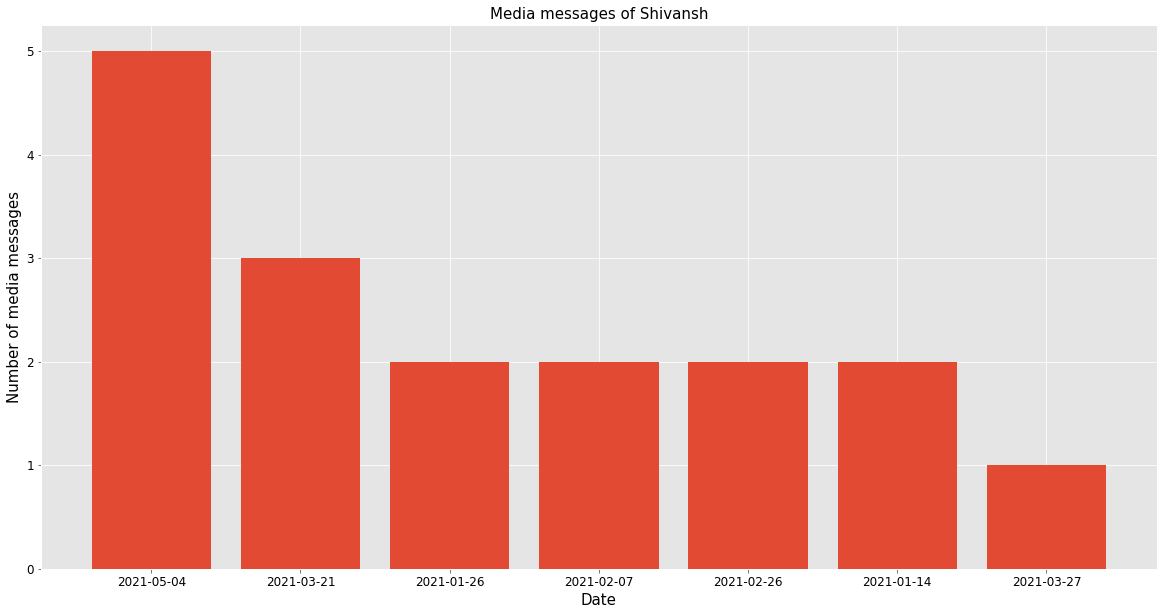

In [ ]:
df_shivansh_media = img[img.Name=='Shivansh Bhardwaj'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_shivansh_media.index],df_shivansh_media)
plt.title('Media messages of Shivansh',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Tejas

2021-07-07 13:10:46,917 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:46,920 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


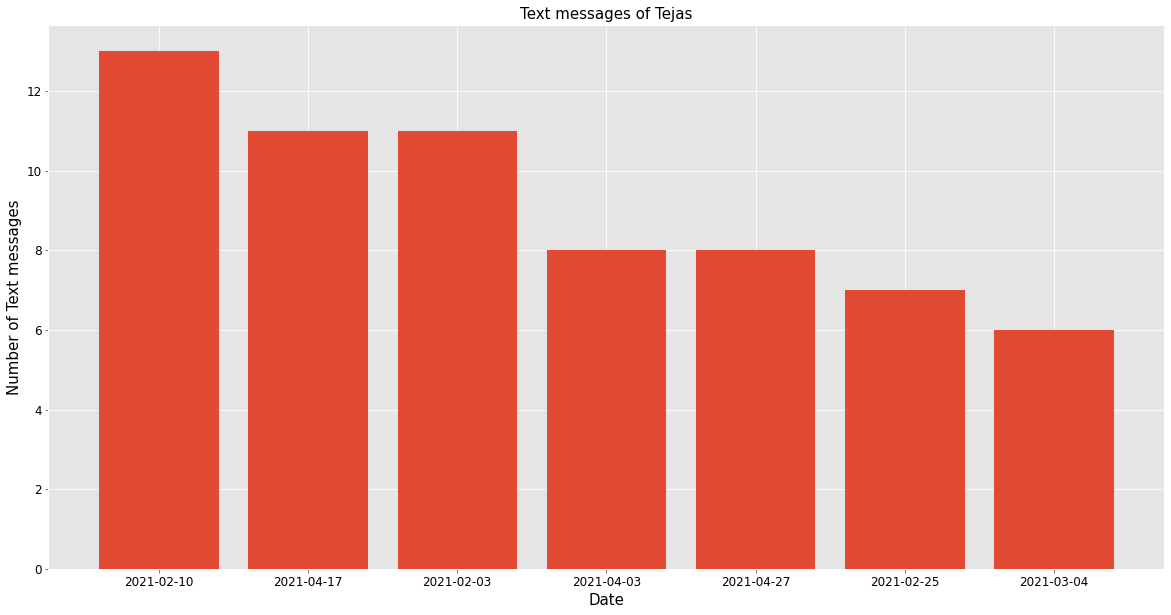

In [ ]:
df_tejas_text =  df_text_1[df_text_1.Name=='Tejas Pawar'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_tejas_text.index],df_tejas_text)
plt.title('Text messages of Tejas',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

2021-07-07 13:10:47,198 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2021-07-07 13:10:47,201 | INFO | category.py:219 | update | Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


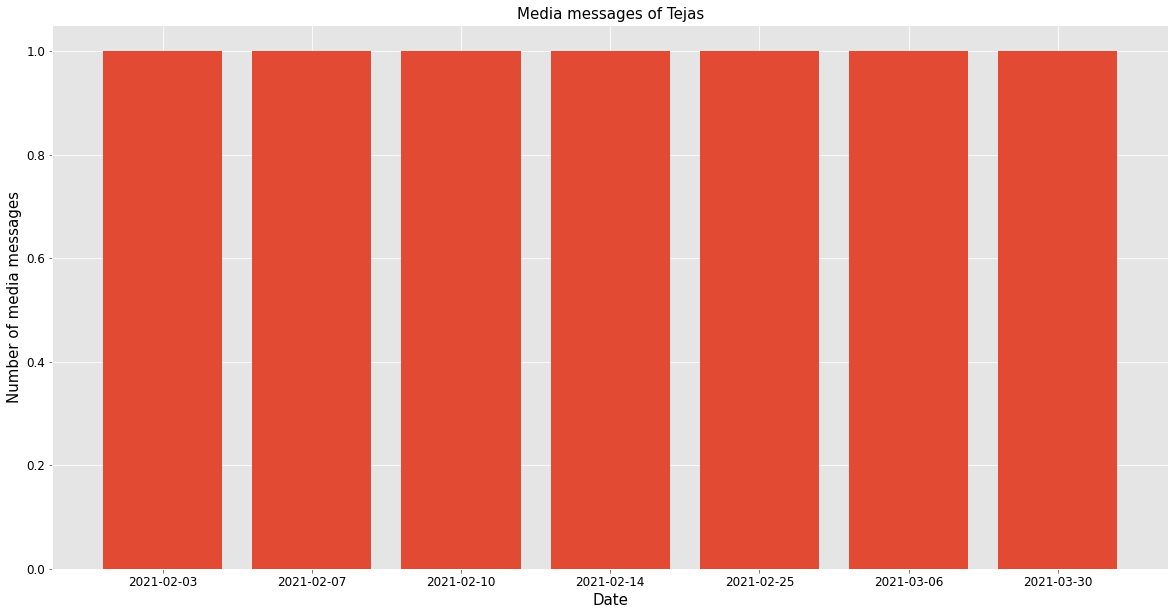

In [ ]:
df_tejas_media = img[img.Name=='Tejas Pawar'].groupby('Date').count().sort_values(by='Message', ascending=False)['Message'].head(7)

plt.bar([str(d).replace(' 00:00:00','') for d in df_tejas_media.index],df_tejas_media)
plt.title('Media messages of Tejas',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Date',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

### Analysing hour person wise

#### Abhinav

In [ ]:
abhinav_hour_count_text = pd.DataFrame(df_text_1[df_text_1.Name=='Abhinav Apurva'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)
abhinav_hour_count_media = pd.DataFrame(img[img.Name=='Abhinav Apurva'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)

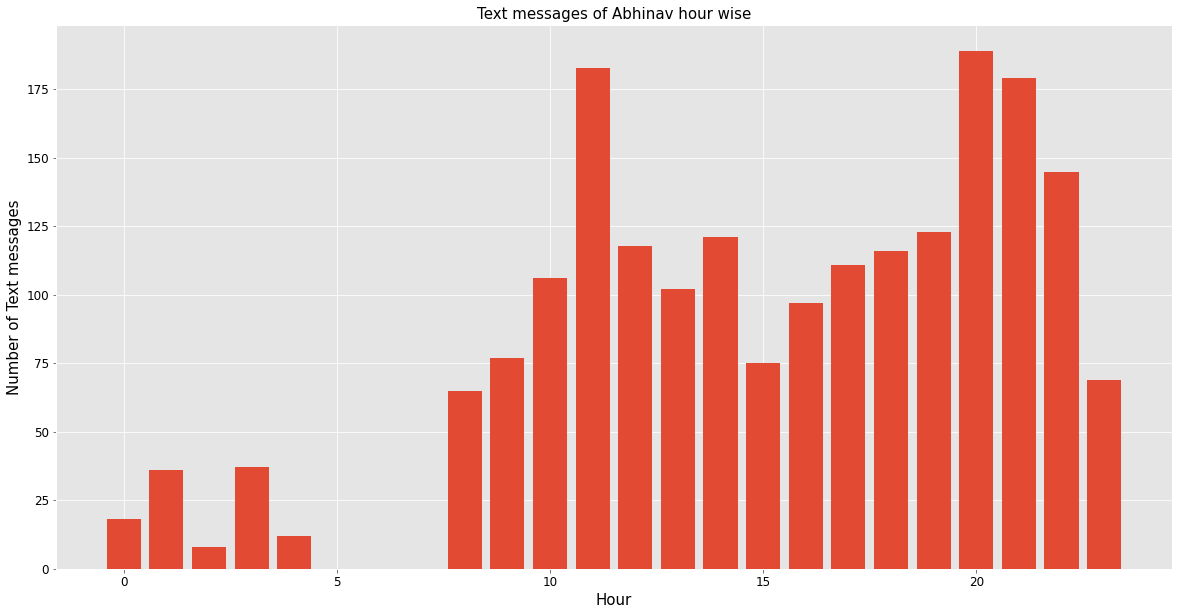

In [ ]:
plt.bar(abhinav_hour_count_text.sort_values(by='Hour').Hour,abhinav_hour_count_text.sort_values(by='Hour').Count)
plt.title('Text messages of Abhinav hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

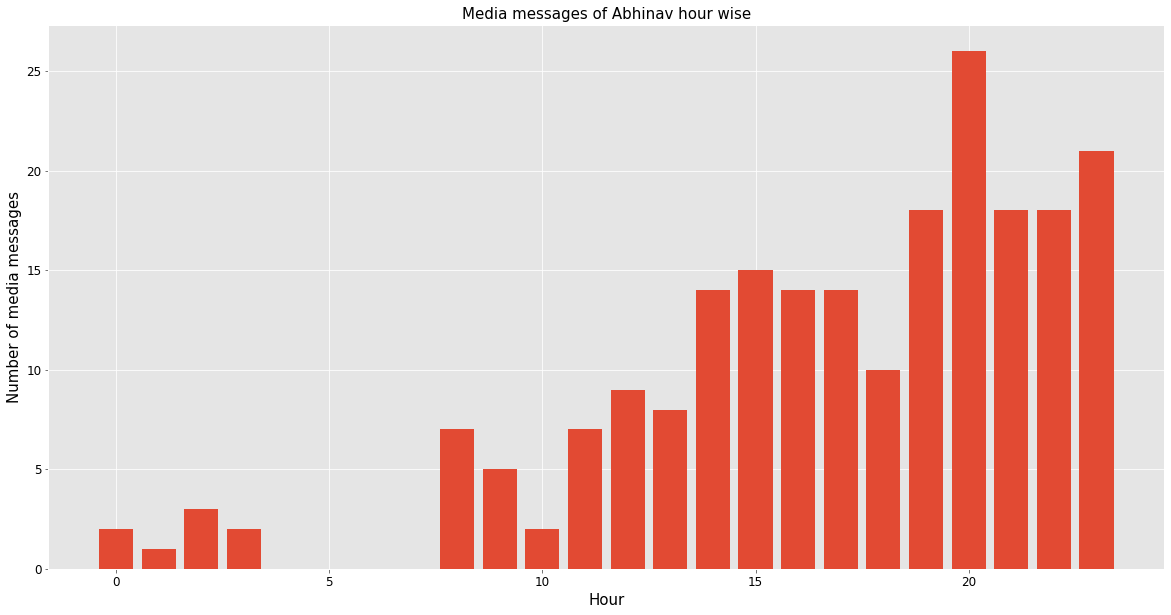

In [ ]:
plt.bar(abhinav_hour_count_media.sort_values(by='Hour').Hour,abhinav_hour_count_media.sort_values(by='Hour').Count)
plt.title('Media messages of Abhinav hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Advait

In [ ]:
advait_hour_count_text = pd.DataFrame(df_text_1[df_text_1.Name=='Advait Padaval'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)
advait_hour_count_media = pd.DataFrame(img[img.Name=='Advait Padaval'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)

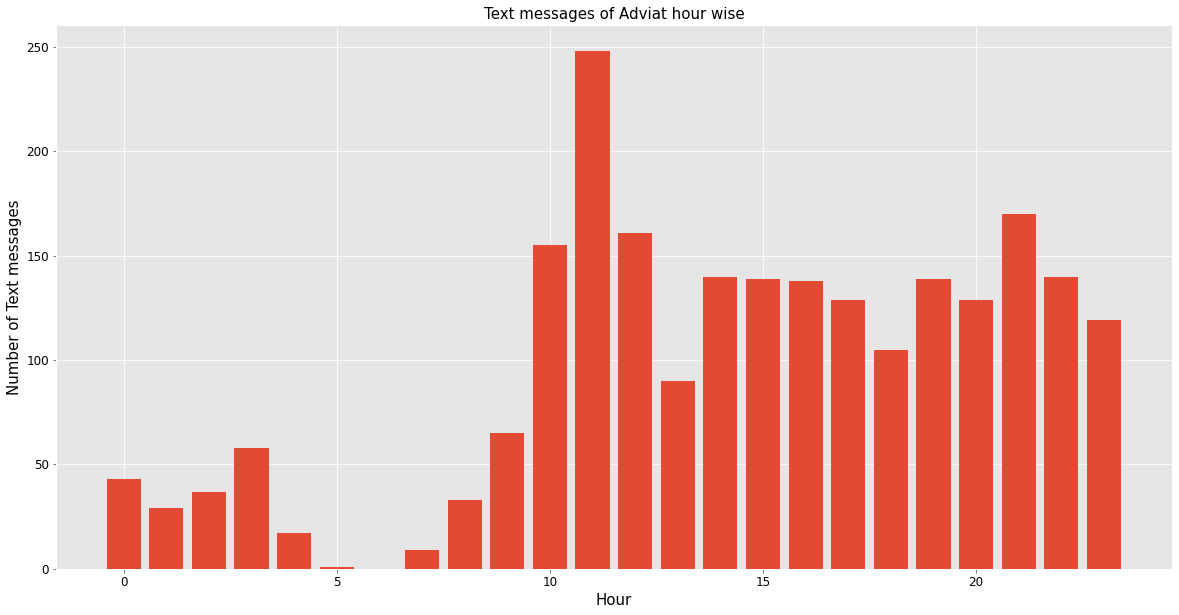

In [ ]:
plt.bar(advait_hour_count_text.sort_values(by='Hour').Hour,advait_hour_count_text.sort_values(by='Hour').Count)
plt.title('Text messages of Adviat hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

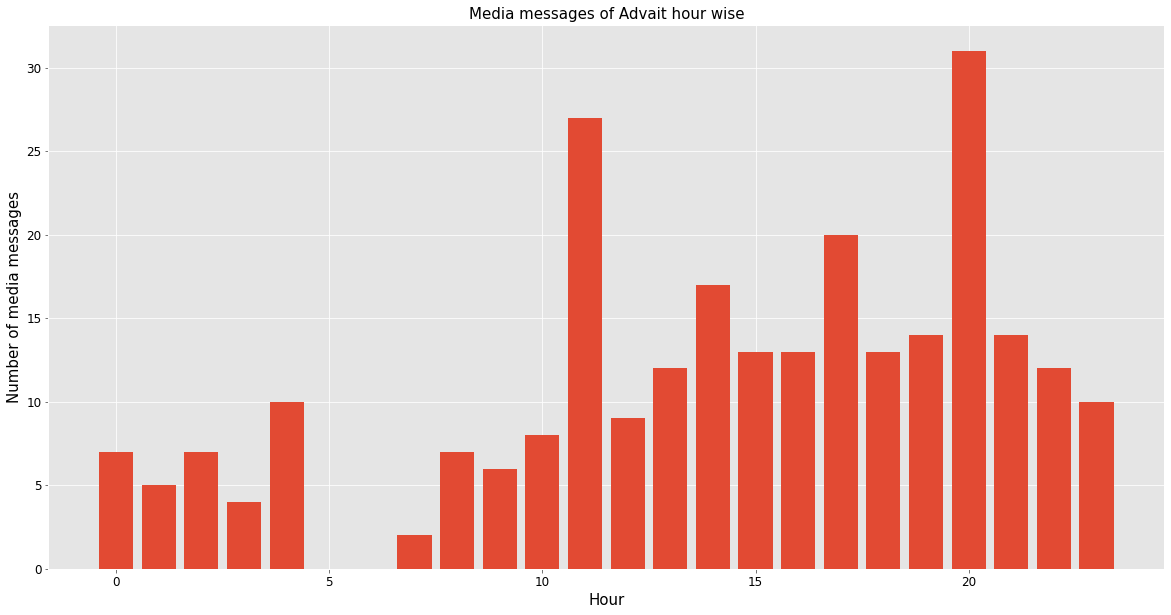

In [ ]:
plt.bar(advait_hour_count_media.sort_values(by='Hour').Hour,advait_hour_count_media.sort_values(by='Hour').Count)
plt.title('Media messages of Advait hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Anuj

In [ ]:
anuj_hour_count_text = pd.DataFrame(df_text_1[df_text_1.Name=='Anuj Agarwal'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)
anuj_hour_count_media = pd.DataFrame(img[img.Name=='Anuj Agarwal'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)

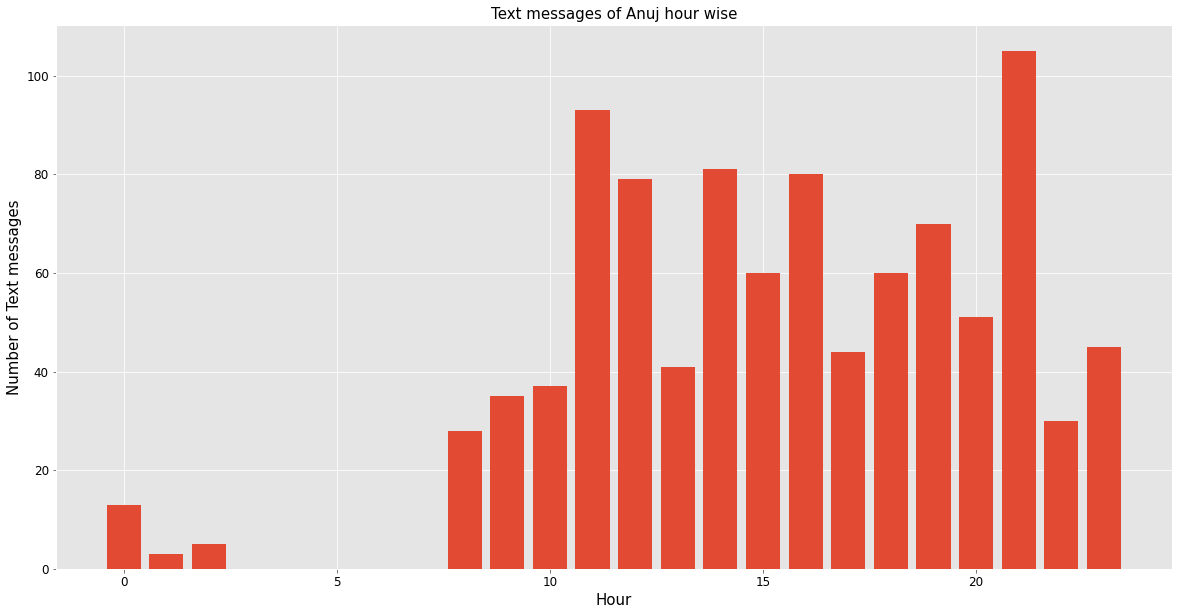

In [ ]:
plt.bar(anuj_hour_count_text.sort_values(by='Hour').Hour,anuj_hour_count_text.sort_values(by='Hour').Count)
plt.title('Text messages of Anuj hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

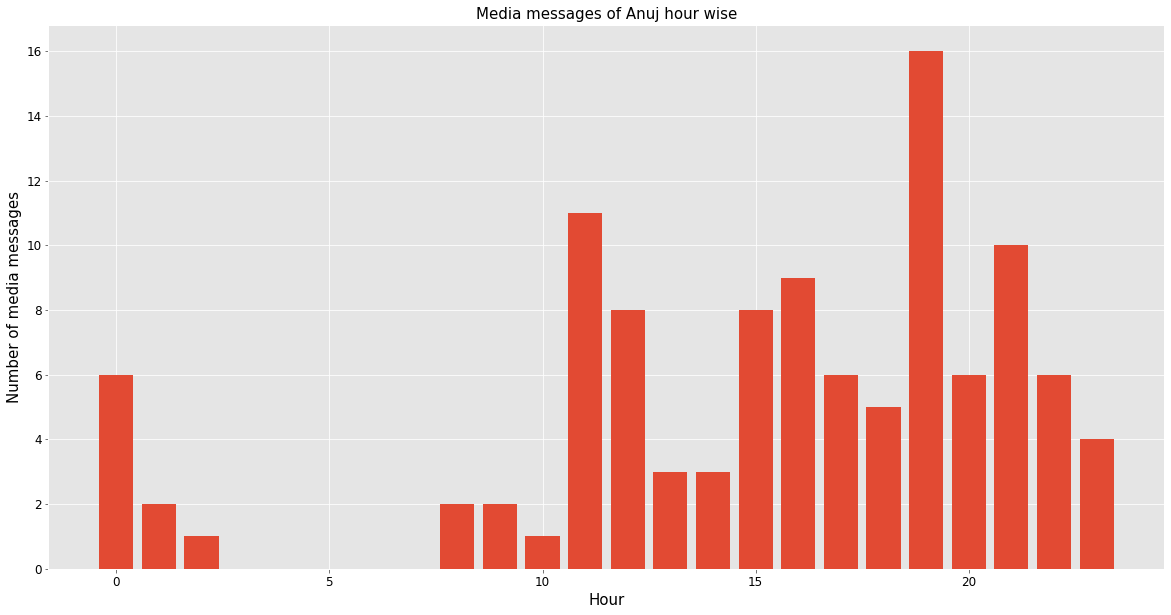

In [ ]:
plt.bar(anuj_hour_count_media.sort_values(by='Hour').Hour,anuj_hour_count_media.sort_values(by='Hour').Count)
plt.title('Media messages of Anuj hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Keerthan

In [ ]:
keerthan_hour_count_text = pd.DataFrame(df_text_1[df_text_1.Name=='Keerthan Ramesh'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)
keerthan_hour_count_media = pd.DataFrame(img[img.Name=='Keerthan Ramesh'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)

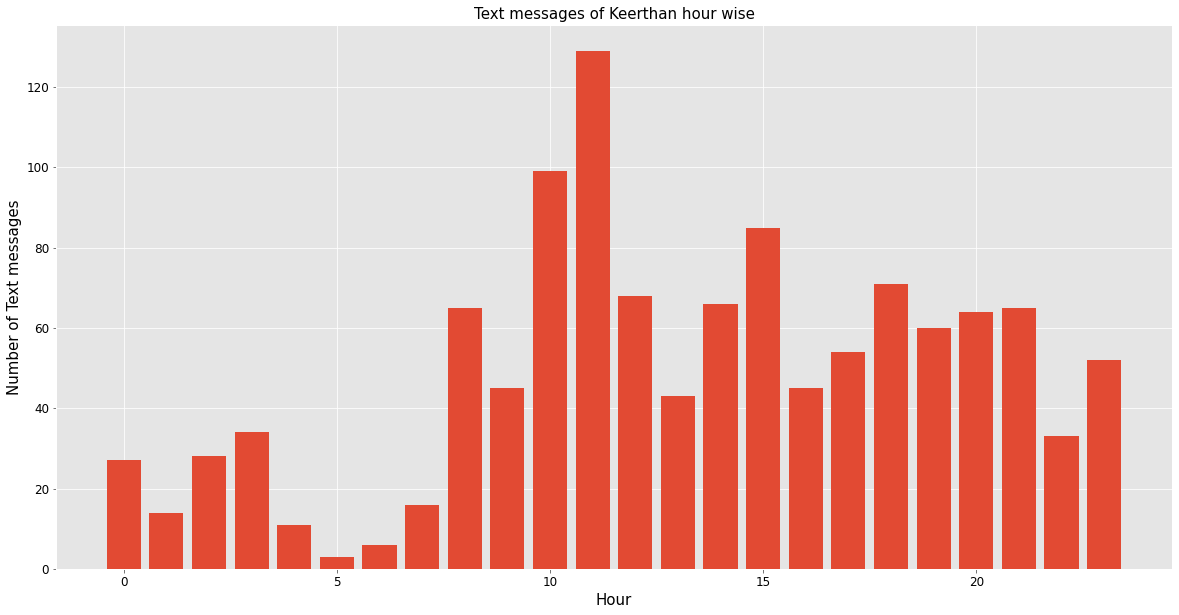

In [ ]:
plt.bar(keerthan_hour_count_text.sort_values(by='Hour').Hour,keerthan_hour_count_text.sort_values(by='Hour').Count)
plt.title('Text messages of Keerthan hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

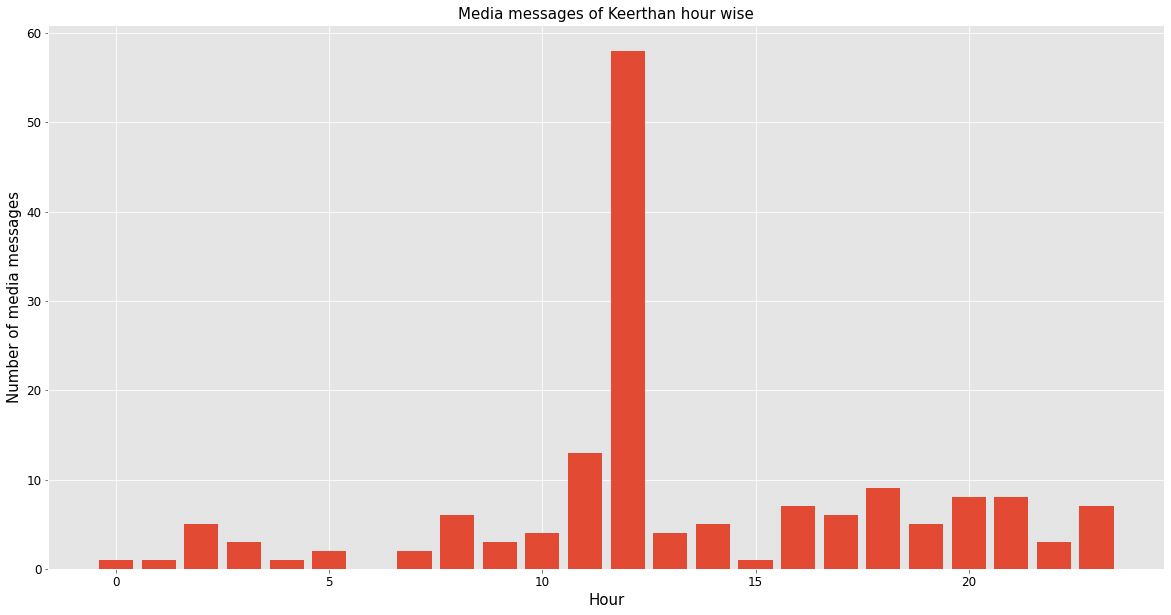

In [ ]:
plt.bar(keerthan_hour_count_media.sort_values(by='Hour').Hour,keerthan_hour_count_media.sort_values(by='Hour').Count)
plt.title('Media messages of Keerthan hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Swapnil

In [ ]:
swapnil_hour_count_text = pd.DataFrame(df_text_1[df_text_1.Name=='Swapnil Ghosh'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)
swapnil_hour_count_media = pd.DataFrame(img[img.Name=='Swapnil Ghosh'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)

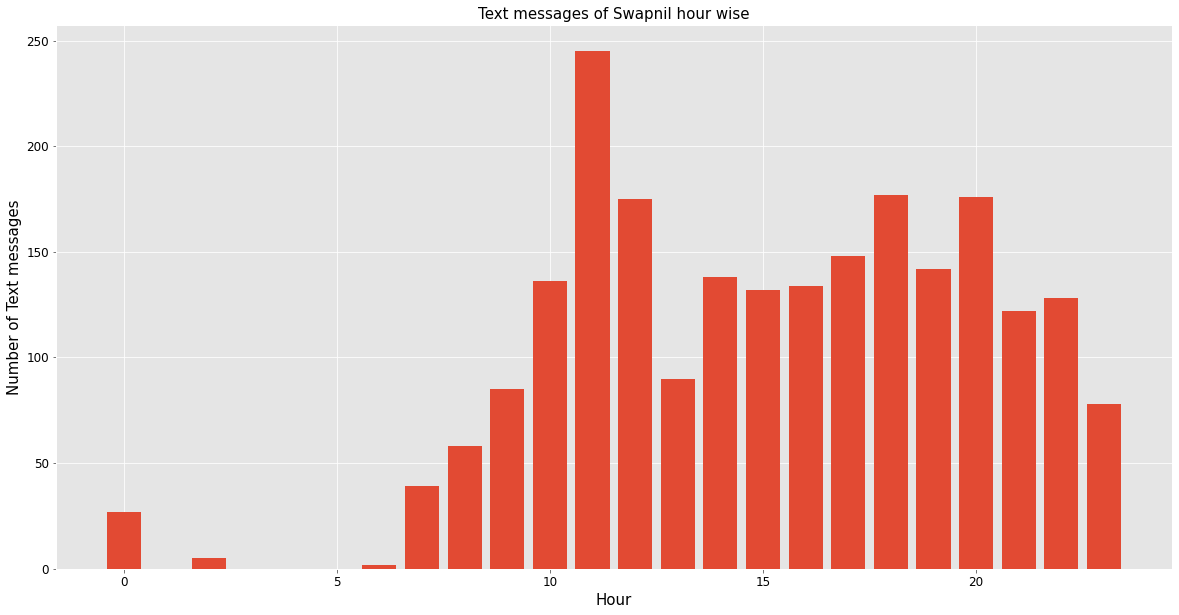

In [ ]:
plt.bar(swapnil_hour_count_text.sort_values(by='Hour').Hour,swapnil_hour_count_text.sort_values(by='Hour').Count)
plt.title('Text messages of Swapnil hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

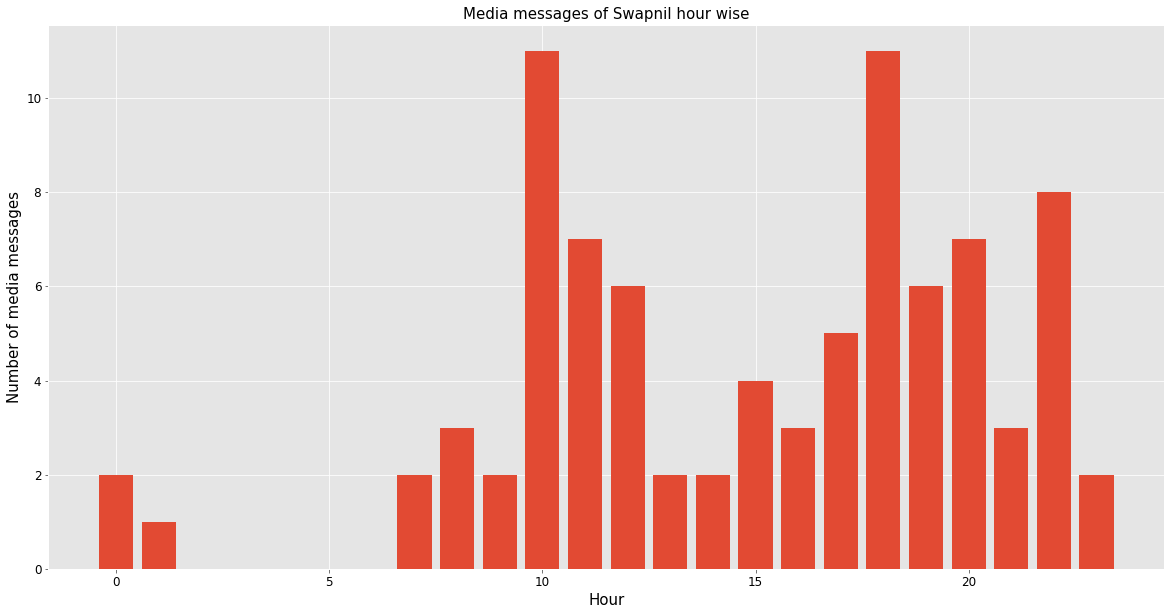

In [ ]:
plt.bar(swapnil_hour_count_media.sort_values(by='Hour').Hour,swapnil_hour_count_media.sort_values(by='Hour').Count)
plt.title('Media messages of Swapnil hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Saurabh

In [ ]:
saurabh_hour_count_text = pd.DataFrame(df_text_1[df_text_1.Name=='Saurabh Verma'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)
saurabh_hour_count_media = pd.DataFrame(img[img.Name=='Saurabh Verma'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)

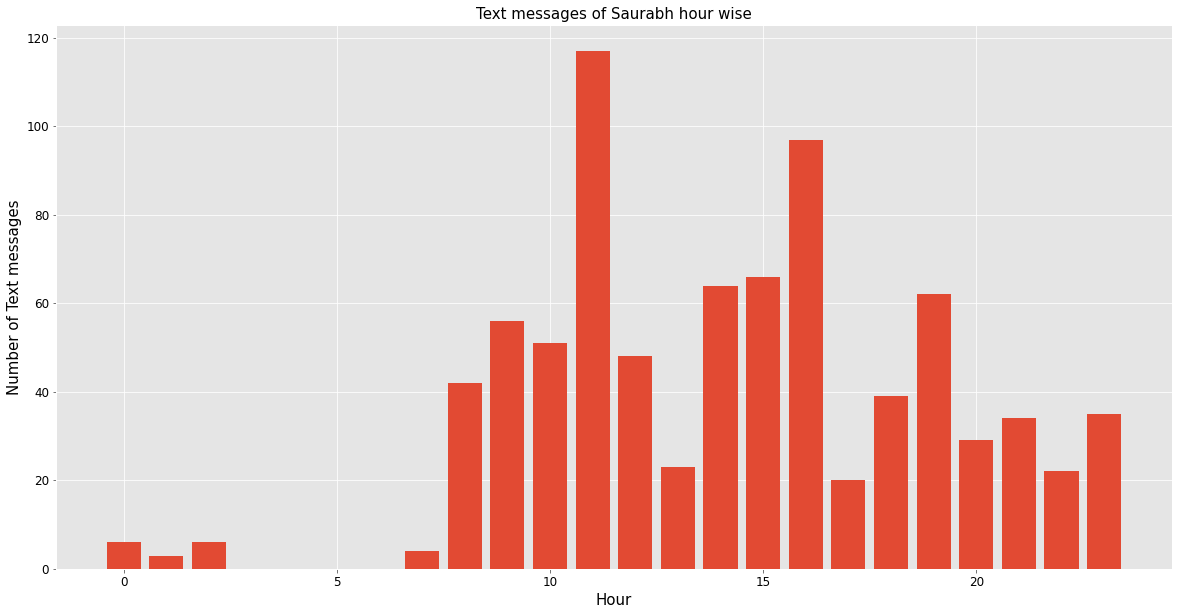

In [ ]:
plt.bar(saurabh_hour_count_text.sort_values(by='Hour').Hour,saurabh_hour_count_text.sort_values(by='Hour').Count)
plt.title('Text messages of Saurabh hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

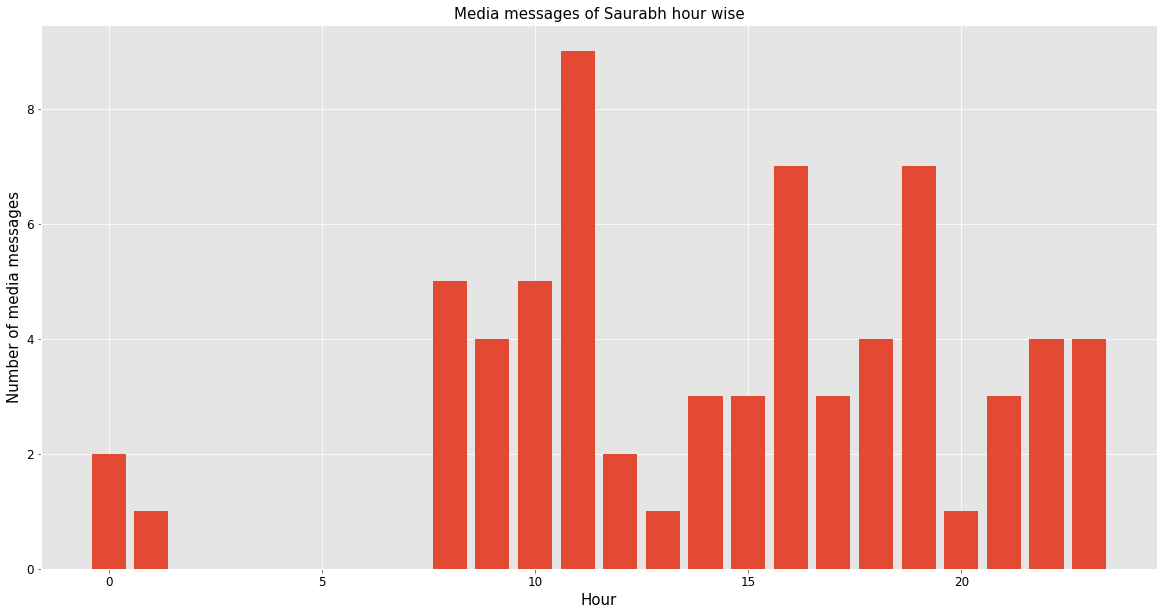

In [ ]:
plt.bar(saurabh_hour_count_media.sort_values(by='Hour').Hour,saurabh_hour_count_media.sort_values(by='Hour').Count)
plt.title('Media messages of Saurabh hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Shivansh

In [ ]:
shivansh_hour_count_text = pd.DataFrame(df_text_1[df_text_1.Name=='Shivansh Bhardwaj'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)
shivansh_hour_count_media = pd.DataFrame(img[img.Name=='Shivansh Bhardwaj'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)

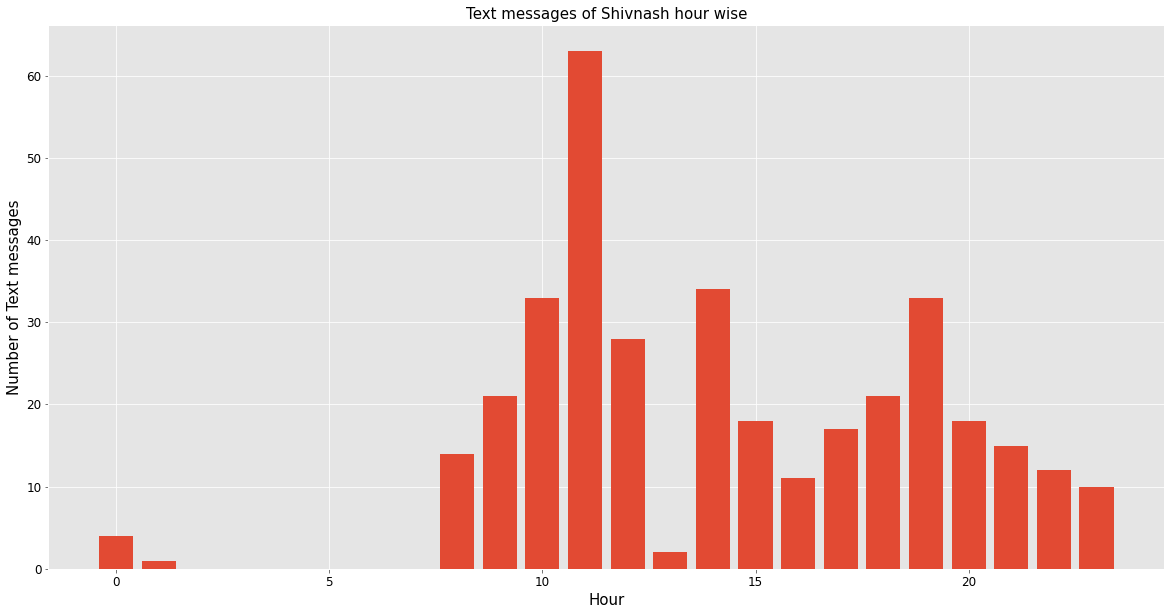

In [ ]:
plt.bar(shivansh_hour_count_text.sort_values(by='Hour').Hour,shivansh_hour_count_text.sort_values(by='Hour').Count)
plt.title('Text messages of Shivnash hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

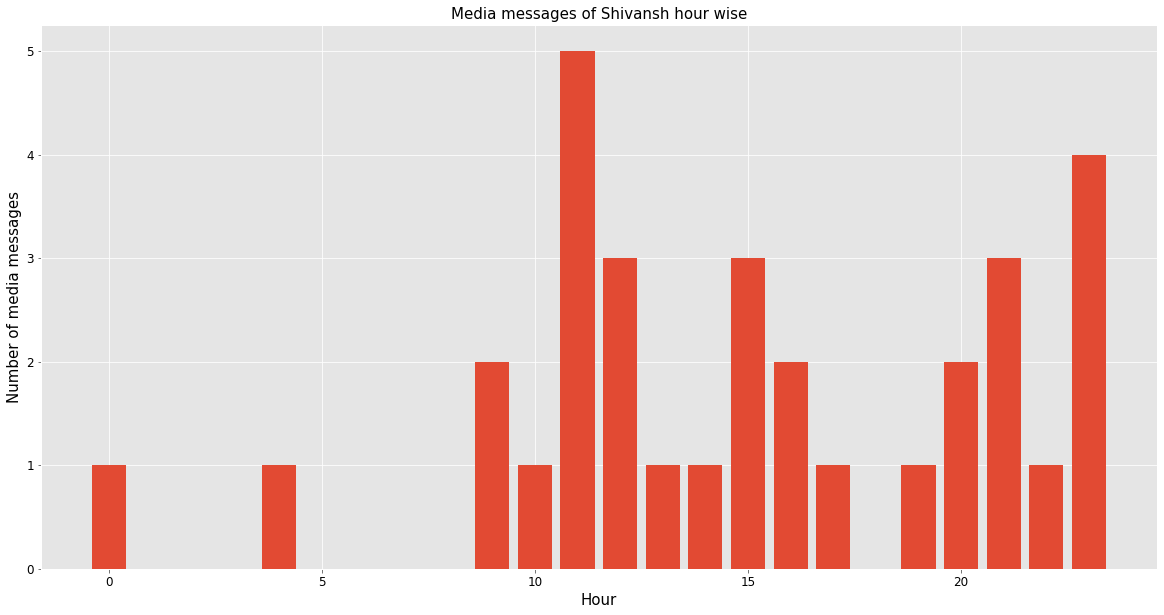

In [ ]:
plt.bar(shivansh_hour_count_media.sort_values(by='Hour').Hour,shivansh_hour_count_media.sort_values(by='Hour').Count)
plt.title('Media messages of Shivansh hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

#### Tejas

In [ ]:
tejas_hour_count_text = pd.DataFrame(df_text_1[df_text_1.Name=='Tejas Pawar'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)
tejas_hour_count_media = pd.DataFrame(img[img.Name=='Tejas Pawar'].Hour.value_counts()).reset_index().set_axis(["Hour", "Count"], axis=1)

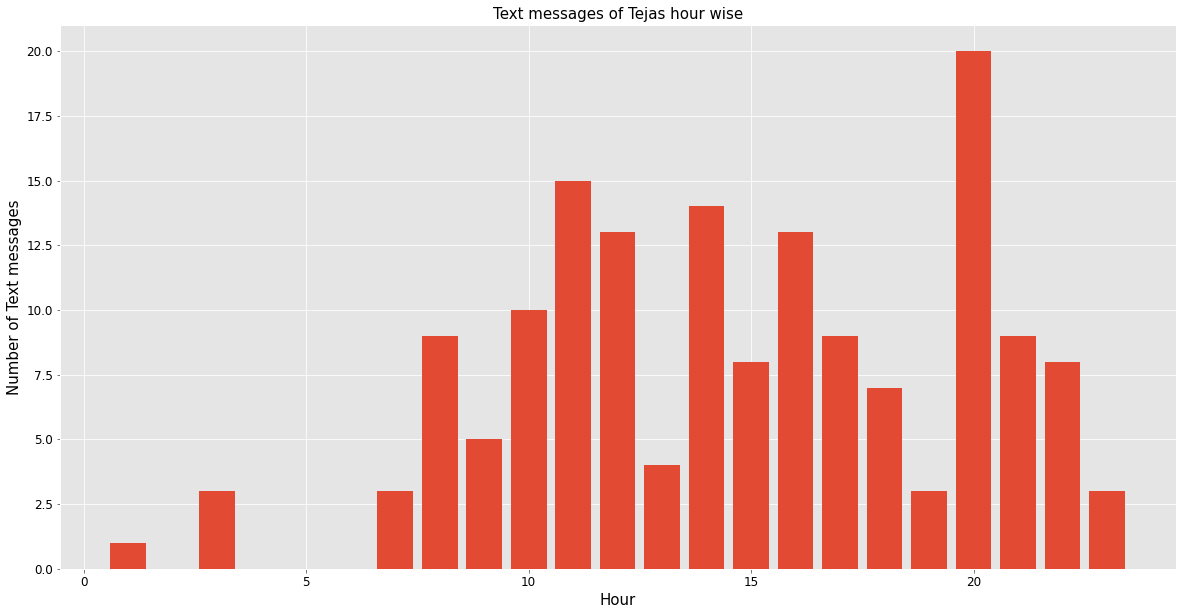

In [ ]:
plt.bar(tejas_hour_count_text.sort_values(by='Hour').Hour,tejas_hour_count_text.sort_values(by='Hour').Count)
plt.title('Text messages of Tejas hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of Text messages',color = 'black', fontsize=15)

plt.show()

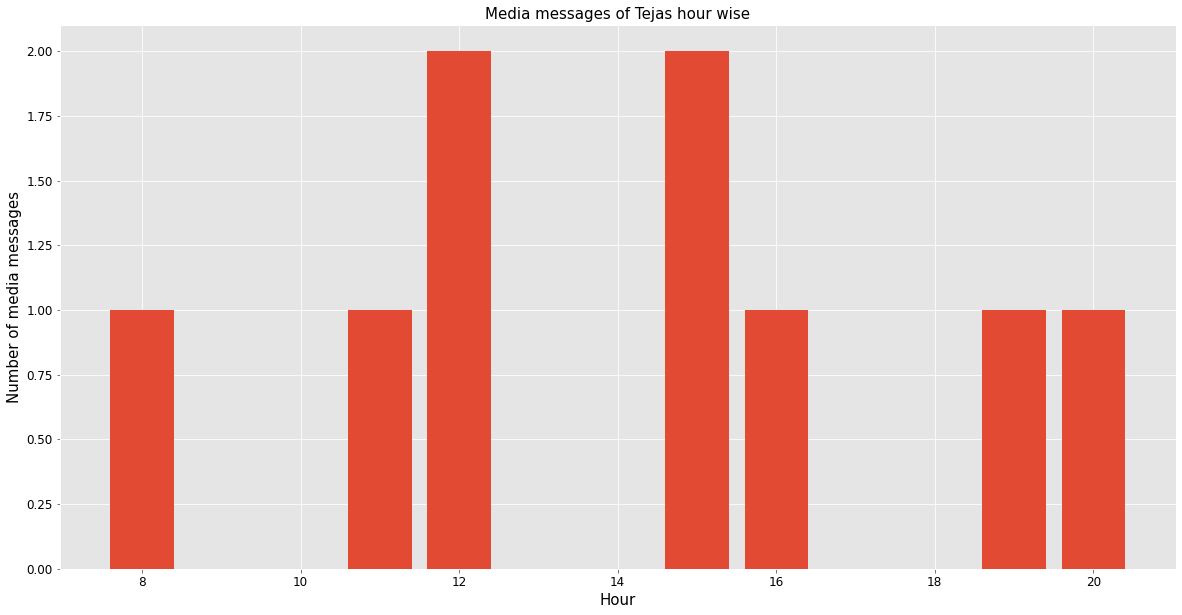

In [ ]:
plt.bar(tejas_hour_count_media.sort_values(by='Hour').Hour,tejas_hour_count_media.sort_values(by='Hour').Count)
plt.title('Media messages of Tejas hour wise',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Hour',color = 'black', fontsize=15)
plt.ylabel('Number of media messages',color = 'black', fontsize=15)

plt.show()

### Analysing words person wise

#### Abhinav

In [ ]:
words_abhinav = []
for msg in df_text_1[df_text_1.Name=='Abhinav Apurva'].Message:
  for m in msg.lower().split():
    words_abhinav.append(m.replace(',','').replace('!','').replace('?','').replace('*',''))

In [ ]:
words_abhinav = pd.DataFrame([[x,words_abhinav.count(x)] for x in set(words_abhinav)]).sort_values(by=1,ascending=False)

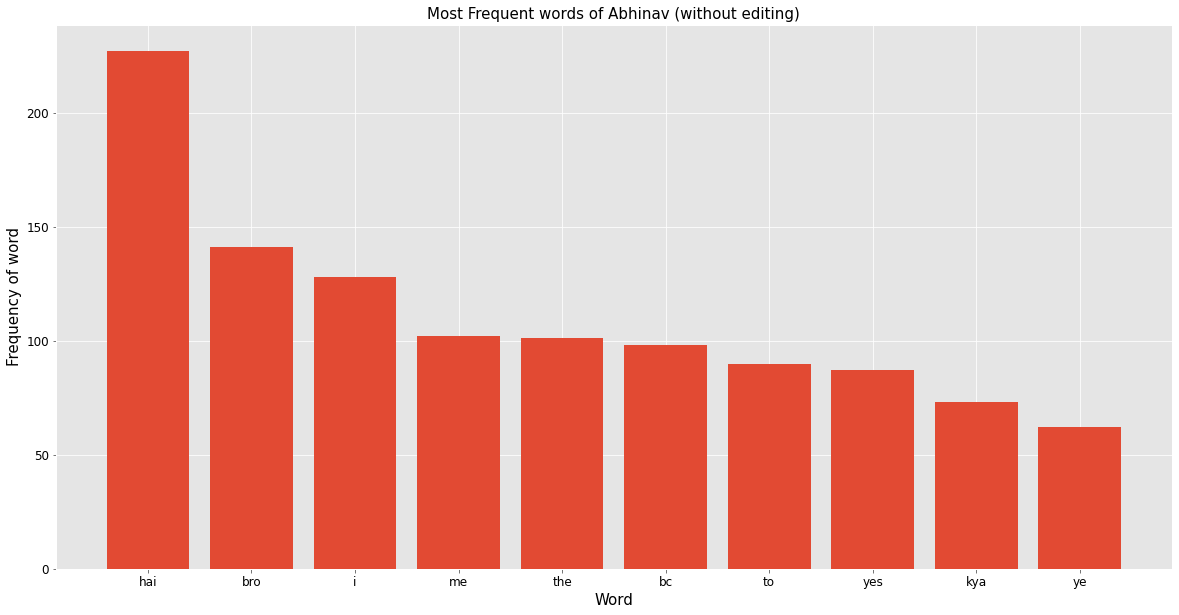

In [ ]:
plt.bar(words_abhinav.head(10)[0],words_abhinav.head(10)[1])
plt.title('Most Frequent words of Abhinav (without editing)',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Word',color = 'black', fontsize=15)
plt.ylabel('Frequency of word',color = 'black', fontsize=15)

plt.show()

#### Advait

In [ ]:
words_advait = []
for msg in df_text_1[df_text_1.Name=='Advait Padaval'].Message:
  for m in msg.lower().split():
    words_advait.append(m.replace(',','').replace('!','').replace('?','').replace('*',''))

In [ ]:
words_advait = pd.DataFrame([[x,words_advait.count(x)] for x in set(words_advait)]).sort_values(by=1,ascending=False)

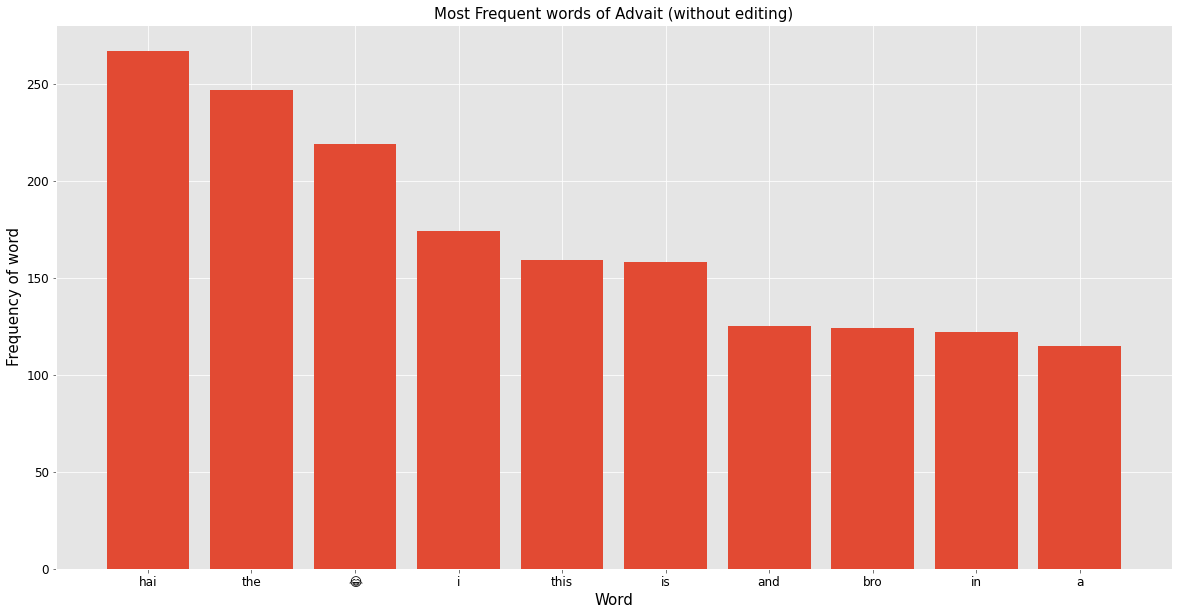

In [ ]:
plt.bar(words_advait.head(10)[0],words_advait.head(10)[1])
plt.title('Most Frequent words of Advait (without editing)',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Word',color = 'black', fontsize=15)
plt.ylabel('Frequency of word',color = 'black', fontsize=15)

plt.show()

#### Anuj

In [ ]:
words_anuj = []
for msg in df_text_1[df_text_1.Name=='Anuj Agarwal'].Message:
  for m in msg.lower().split():
    words_anuj.append(m.replace(',','').replace('!','').replace('?','').replace('*',''))

In [ ]:
words_anuj = pd.DataFrame([[x,words_anuj.count(x)] for x in set(words_anuj)]).sort_values(by=1,ascending=False)

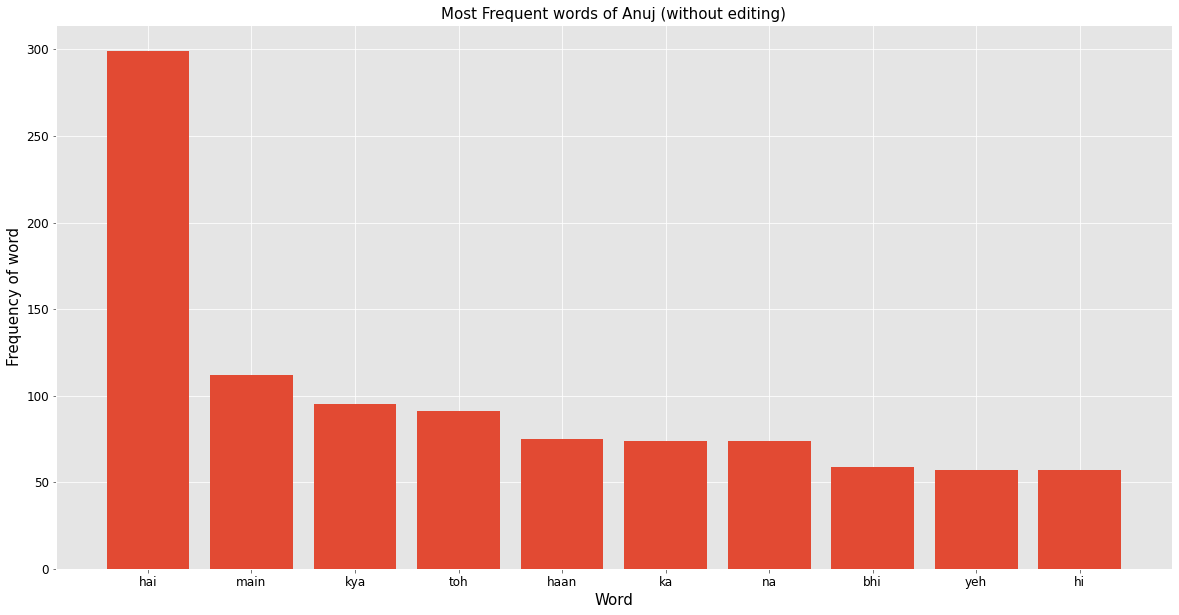

In [ ]:
plt.bar(words_anuj.head(10)[0],words_anuj.head(10)[1])
plt.title('Most Frequent words of Anuj (without editing)',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Word',color = 'black', fontsize=15)
plt.ylabel('Frequency of word',color = 'black', fontsize=15)

plt.show()

#### Keerthan

In [ ]:
words_keerthan = []
for msg in df_text_1[df_text_1.Name=='Keerthan Ramesh'].Message:
  for m in msg.lower().split():
    words_keerthan.append(m.replace(',','').replace('!','').replace('?','').replace('*',''))

In [ ]:
words_keerthan = pd.DataFrame([[x,words_keerthan.count(x)] for x in set(words_keerthan)]).sort_values(by=1,ascending=False)

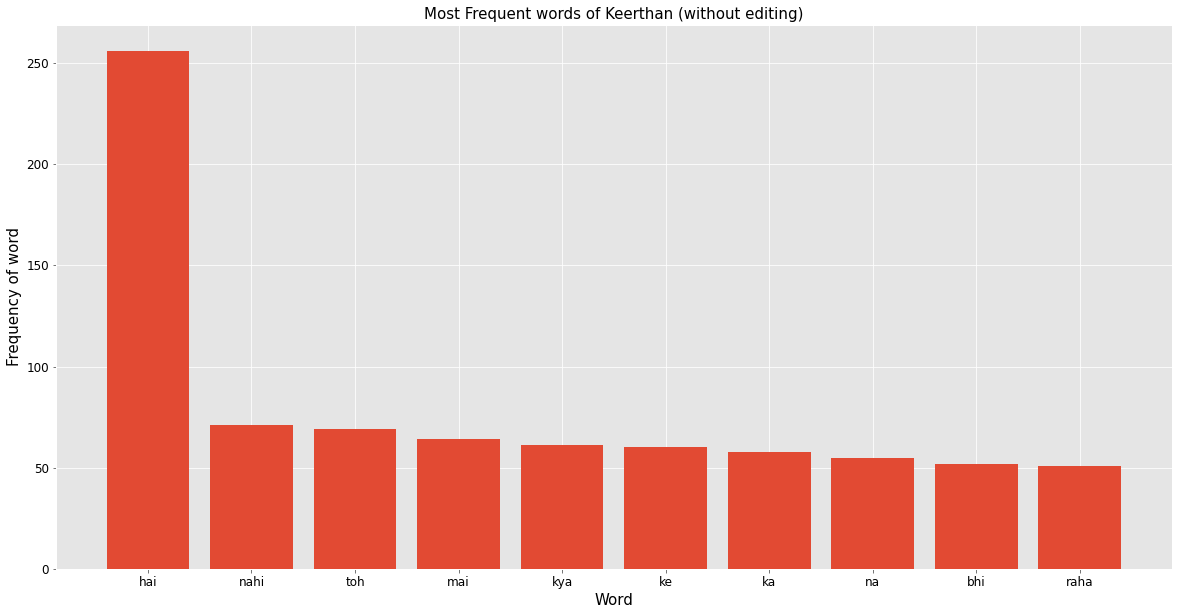

In [ ]:
plt.bar(words_keerthan.head(10)[0],words_keerthan.head(10)[1])
plt.title('Most Frequent words of Keerthan (without editing)',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Word',color = 'black', fontsize=15)
plt.ylabel('Frequency of word',color = 'black', fontsize=15)

plt.show()

#### Swapnil

In [ ]:
words_swapnil = []
for msg in df_text_1[df_text_1.Name=='Swapnil Ghosh'].Message:
  for m in msg.lower().split():
    words_swapnil.append(m.replace(',','').replace('!','').replace('?','').replace('*',''))

In [ ]:
words_swapnil = pd.DataFrame([[x,words_swapnil.count(x)] for x in set(words_swapnil)]).sort_values(by=1,ascending=False)

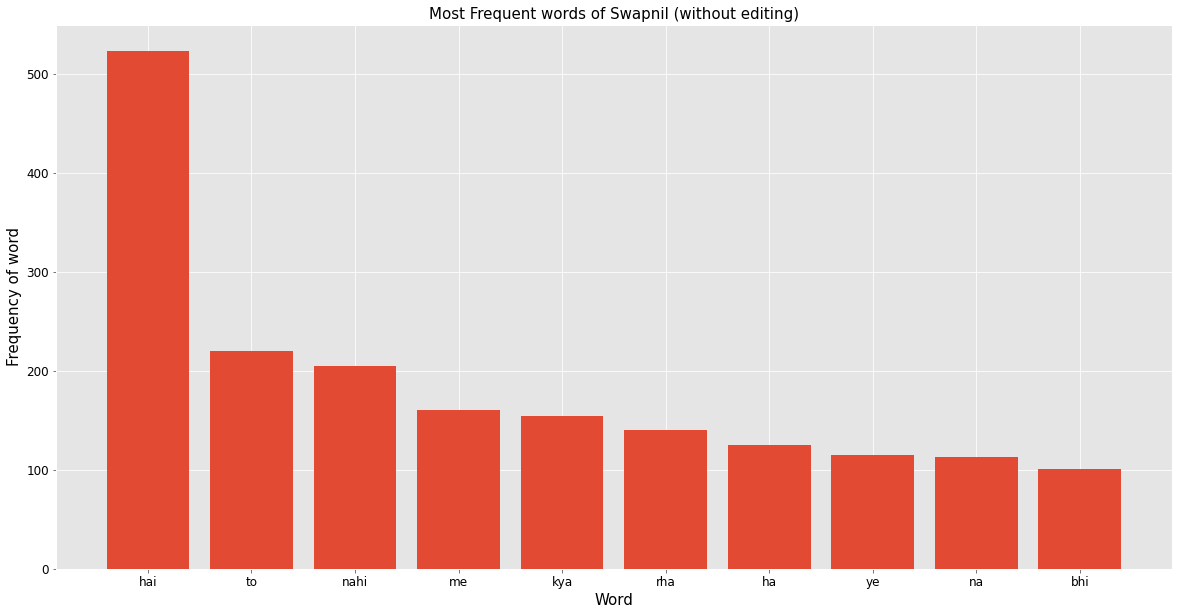

In [ ]:
plt.bar(words_swapnil.head(10)[0],words_swapnil.head(10)[1])
plt.title('Most Frequent words of Swapnil (without editing)',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Word',color = 'black', fontsize=15)
plt.ylabel('Frequency of word',color = 'black', fontsize=15)

plt.show()

#### Saurabh

In [ ]:
words_saurabh = []
for msg in df_text_1[df_text_1.Name=='Saurabh Verma'].Message:
  for m in msg.lower().split():
    words_saurabh.append(m.replace(',','').replace('!','').replace('?','').replace('*',''))

In [ ]:
words_saurabh = pd.DataFrame([[x,words_saurabh.count(x)] for x in set(words_saurabh)]).sort_values(by=1,ascending=False)

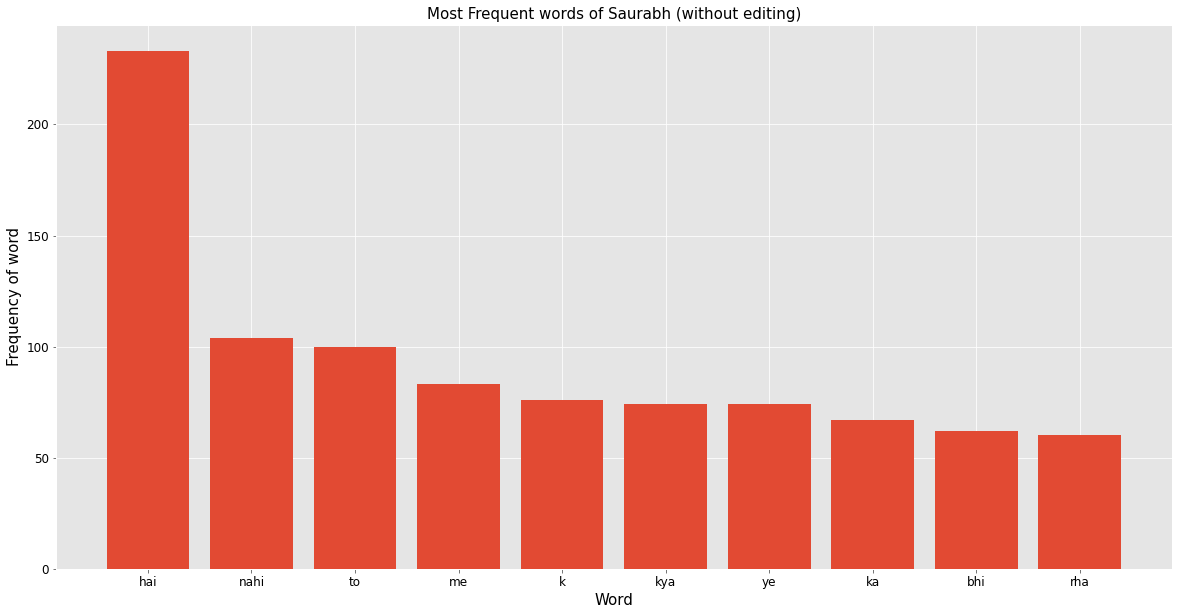

In [ ]:
plt.bar(words_saurabh.head(10)[0],words_saurabh.head(10)[1])
plt.title('Most Frequent words of Saurabh (without editing)',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Word',color = 'black', fontsize=15)
plt.ylabel('Frequency of word',color = 'black', fontsize=15)

plt.show()

#### Shivansh

In [ ]:
words_shivansh = []
for msg in df_text_1[df_text_1.Name=='Shivansh Bhardwaj'].Message:
  for m in msg.lower().split():
    words_shivansh.append(m.replace(',','').replace('!','').replace('?','').replace('*',''))

In [ ]:
words_shivansh = pd.DataFrame([[x,words_shivansh.count(x)] for x in set(words_shivansh)]).sort_values(by=1,ascending=False)

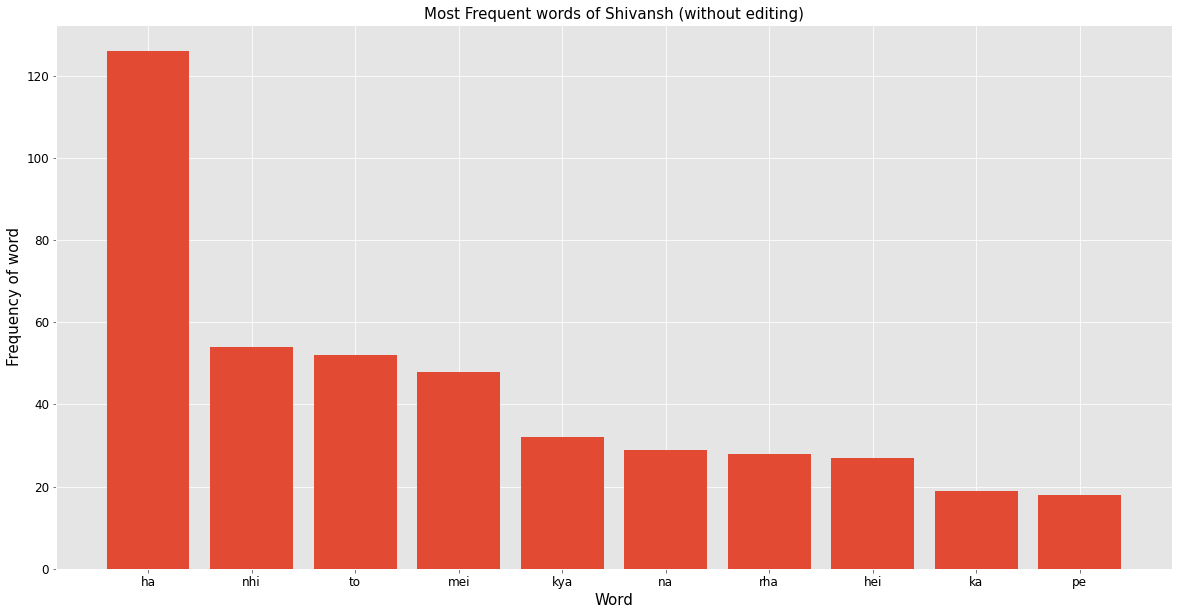

In [ ]:
plt.bar(words_shivansh.head(10)[0],words_shivansh.head(10)[1])
plt.title('Most Frequent words of Shivansh (without editing)',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Word',color = 'black', fontsize=15)
plt.ylabel('Frequency of word',color = 'black', fontsize=15)

plt.show()

#### Tejas

In [ ]:
words_tejas = []
for msg in df_text_1[df_text_1.Name=='Tejas Pawar'].Message:
  for m in msg.lower().split():
    words_tejas.append(m.replace(',','').replace('!','').replace('?','').replace('*',''))

In [ ]:
words_tejas = pd.DataFrame([[x,words_tejas.count(x)] for x in set(words_tejas)]).sort_values(by=1,ascending=False)

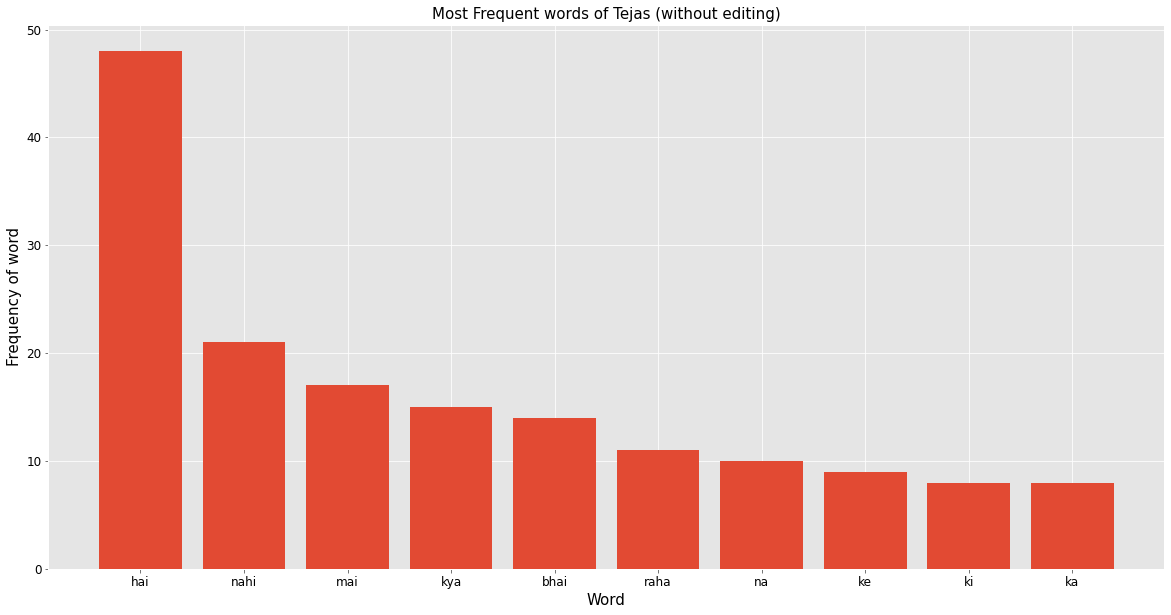

In [ ]:
plt.bar(words_tejas.drop(0, axis=0).head(10)[0],words_tejas.drop(0, axis=0).head(10)[1])
plt.title('Most Frequent words of Tejas (without editing)',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Word',color = 'black', fontsize=15)
plt.ylabel('Frequency of word',color = 'black', fontsize=15)

plt.show()

### Words analysis

In [ ]:
word_list_names = ['Abhinav Apurva', 'Advait Padaval', 'Anuj Agarwal', 'Keerthan Ramesh', 'Swapnil Ghosh', 'Saurabh Verma', 'Shivansh Bhardwaj', 'Tejas Pawar']

In [ ]:
words_list = []
for n in word_list_names:
  for msg in df_text_1[df_text_1.Name==n].Message:
    for m in msg.lower().split():
      words_list.append(m.replace(',','').replace('!','').replace('?','').replace('*',''))


In [ ]:
words_list = pd.DataFrame([[x,words_list.count(x)] for x in set(words_list)]).sort_values(by=1,ascending=False)

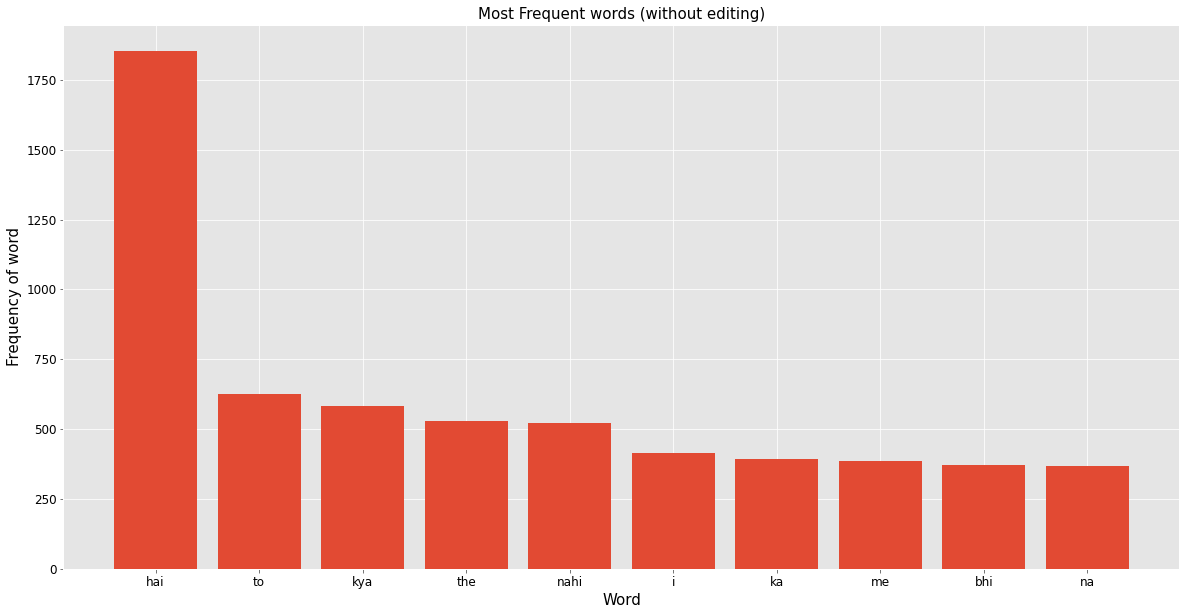

In [ ]:
plt.bar(words_list.head(10)[0],words_list.head(10)[1])
plt.title('Most Frequent words (without editing)',color = 'black', fontsize=15)
plt.xticks(color = 'black', fontsize=12)
plt.yticks(color = 'black', fontsize=12)
plt.xlabel('Word',color = 'black', fontsize=15)
plt.ylabel('Frequency of word',color = 'black', fontsize=15)

plt.show()

### Emoji

In [ ]:
emoji_counter = []
for msg in df_text_1.Message:
  emoji_dict = adv.extract_emoji(msg)
  new_list = emoji_dict['emoji']
  new_list = [l for l in new_list if l!=[]]
  new_list = [l[0] for l in new_list]
  emoji_counter = emoji_counter + new_list

In [ ]:
emojis = [[e,emoji_counter.count(e)] for e in set(emoji_counter)]

In [ ]:
emojis_df = pd.DataFrame(emojis).sort_values(1, ascending = False).replace('🥲','smile-tear').reset_index(drop=True).rename(columns = {0:'Emoji',1:'Count'})

In [ ]:
emojis_df.head(15)

,Emoji,Count
0,😂,1629
1,🔥,230
2,😅,184
3,smile-tear,132
4,♂,122
5,🤦,96
6,❤,96
7,😌,69
8,🥳,52
9,🥺,46


### Emoji person wise

#### Abhinav

In [ ]:
abhinav_emoji_counter = []
for msg in df_text_1[df_text_1.Name=='Abhinav Apurva'].Message:
  emoji_dict = adv.extract_emoji(msg)
  new_list = emoji_dict['emoji']
  new_list = [l for l in new_list if l!=[]]
  new_list = [l[0] for l in new_list]
  abhinav_emoji_counter = abhinav_emoji_counter + new_list

In [ ]:
abhinav_emojis = [[e,abhinav_emoji_counter.count(e)] for e in set(abhinav_emoji_counter)]

In [ ]:
abhinav_emojis_df = pd.DataFrame(abhinav_emojis).sort_values(1, ascending = False).replace('🥲','smile-tear').reset_index(drop=True).rename(columns = {0:'Emoji',1:'Count'})

In [ ]:
abhinav_emojis_df.head(10)

,Emoji,Count
0,😂,378
1,🔥,28
2,❤,18
3,😌,16
4,😲,15
5,💙,5
6,♂,5
7,🤦,5
8,😢,4
9,😎,3


#### Advait

In [ ]:
advait_emoji_counter = []
for msg in df_text_1[df_text_1.Name=='Advait Padaval'].Message:
  emoji_dict = adv.extract_emoji(msg)
  new_list = emoji_dict['emoji']
  new_list = [l for l in new_list if l!=[]]
  new_list = [l[0] for l in new_list]
  advait_emoji_counter = advait_emoji_counter + new_list

In [ ]:
advait_emojis = [[e,advait_emoji_counter.count(e)] for e in set(advait_emoji_counter)]

In [ ]:
advait_emojis_df = pd.DataFrame(advait_emojis).sort_values(1, ascending = False).replace('🥲','smile-tear').reset_index(drop=True).rename(columns = {0:'Emoji',1:'Count'})

In [ ]:
advait_emojis_df.head(10)

,Emoji,Count
0,😂,516
1,🔥,69
2,smile-tear,58
3,♂,48
4,❤,48
5,🤦,34
6,😌,28
7,🥺,25
8,🤩,23
9,😅,23


#### Anuj

In [ ]:
anuj_emoji_counter = []
for msg in df_text_1[df_text_1.Name=='Anuj Agarwal'].Message:
  emoji_dict = adv.extract_emoji(msg)
  new_list = emoji_dict['emoji']
  new_list = [l for l in new_list if l!=[]]
  new_list = [l[0] for l in new_list]
  anuj_emoji_counter = anuj_emoji_counter + new_list

In [ ]:
anuj_emojis = [[e,anuj_emoji_counter.count(e)] for e in set(anuj_emoji_counter)]

In [ ]:
anuj_emojis_df = pd.DataFrame(anuj_emojis).sort_values(1, ascending = False).replace('🥲','smile-tear').reset_index(drop=True).rename(columns = {0:'Emoji',1:'Count'})

In [ ]:
anuj_emojis_df.head(10)

,Emoji,Count
0,😂,132
1,smile-tear,36
2,🔥,21
3,❤,10
4,😅,9
5,🥺,6
6,🙃,3
7,👍,3
8,💦,3
9,😓,2


#### Keerthan

In [ ]:
keerthan_emoji_counter = []
for msg in df_text_1[df_text_1.Name=='Keerthan Ramesh'].Message:
  emoji_dict = adv.extract_emoji(msg)
  new_list = emoji_dict['emoji']
  new_list = [l for l in new_list if l!=[]]
  new_list = [l[0] for l in new_list]
  keerthan_emoji_counter = keerthan_emoji_counter + new_list

In [ ]:
keerthan_emojis = [[e,keerthan_emoji_counter.count(e)] for e in set(keerthan_emoji_counter)]

In [ ]:
keerthan_emojis_df = pd.DataFrame(keerthan_emojis).sort_values(1, ascending = False).replace('🥲','smile-tear').reset_index(drop=True).rename(columns = {0:'Emoji',1:'Count'})

In [ ]:
keerthan_emojis_df.head(10)

,Emoji,Count
0,😂,251
1,🔥,55
2,🥳,18
3,😔,17
4,❤,14
5,💯,11
6,😌,10
7,♂,8
8,😢,7
9,🤦,7


#### Swapnil

In [ ]:
swapnil_emoji_counter = []
for msg in df_text_1[df_text_1.Name=='Swapnil Ghosh'].Message:
  emoji_dict = adv.extract_emoji(msg)
  new_list = emoji_dict['emoji']
  new_list = [l for l in new_list if l!=[]]
  new_list = [l[0] for l in new_list]
  swapnil_emoji_counter = swapnil_emoji_counter + new_list

In [ ]:
swapnil_emojis = [[e,swapnil_emoji_counter.count(e)] for e in set(swapnil_emoji_counter)]

In [ ]:
swapnil_emojis_df = pd.DataFrame(swapnil_emojis).sort_values(1, ascending = False).replace('🥲','smile-tear').reset_index(drop=True).rename(columns = {0:'Emoji',1:'Count'})

In [ ]:
swapnil_emojis_df.head(10)

,Emoji,Count
0,😂,274
1,😅,130
2,🔥,49
3,🤦,35
4,♂,35
5,👍,22
6,😢,17
7,💙,17
8,🥳,17
9,smile-tear,15


#### Saurabh

In [ ]:
saurabh_emoji_counter = []
for msg in df_text_1[df_text_1.Name=='Saurabh Verma'].Message:
  emoji_dict = adv.extract_emoji(msg)
  new_list = emoji_dict['emoji']
  new_list = [l for l in new_list if l!=[]]
  new_list = [l[0] for l in new_list]
  saurabh_emoji_counter = saurabh_emoji_counter + new_list

In [ ]:
saurabh_emojis = [[e,saurabh_emoji_counter.count(e)] for e in set(saurabh_emoji_counter)]

In [ ]:
saurabh_emojis_df = pd.DataFrame(saurabh_emojis).sort_values(1, ascending = False).replace('🥲','smile-tear').reset_index(drop=True).rename(columns = {0:'Emoji',1:'Count'})

In [ ]:
saurabh_emojis_df.head(10)

,Emoji,Count
0,😂,47
1,😑,19
2,smile-tear,15
3,😌,13
4,😅,11
5,😒,11
6,🤦,10
7,♂,10
8,😕,6
9,😞,6


#### Shivansh

In [ ]:
shivansh_emoji_counter = []
for msg in df_text_1[df_text_1.Name=='Shivansh Bhardwaj'].Message:
  emoji_dict = adv.extract_emoji(msg)
  new_list = emoji_dict['emoji']
  new_list = [l for l in new_list if l!=[]]
  new_list = [l[0] for l in new_list]
  shivansh_emoji_counter = shivansh_emoji_counter + new_list

In [ ]:
shivansh_emojis = [[e,shivansh_emoji_counter.count(e)] for e in set(shivansh_emoji_counter)]

In [ ]:
shivansh_emojis_df = pd.DataFrame(shivansh_emojis).sort_values(1, ascending = False).replace('🥲','smile-tear').reset_index(drop=True).rename(columns = {0:'Emoji',1:'Count'})

In [ ]:
shivansh_emojis_df.head(10)

,Emoji,Count
0,😂,24
1,♂,16
2,🙃,7
3,🤷,7
4,🤦,5
5,😅,5
6,👍,4
7,💁,4
8,😒,3
9,🔥,3


#### Tejas

In [ ]:
tejas_emoji_counter = []
for msg in df_text_1[df_text_1.Name=='Tejas Pawar'].Message:
  emoji_dict = adv.extract_emoji(msg)
  new_list = emoji_dict['emoji']
  new_list = [l for l in new_list if l!=[]]
  new_list = [l[0] for l in new_list]
  tejas_emoji_counter = tejas_emoji_counter + new_list

In [ ]:
tejas_emojis = [[e,tejas_emoji_counter.count(e)] for e in set(tejas_emoji_counter)]

In [ ]:
tejas_emojis_df = pd.DataFrame(tejas_emojis).sort_values(1, ascending = False).replace('🥲','smile-tear').reset_index(drop=True).rename(columns = {0:'Emoji',1:'Count'})

In [ ]:
tejas_emojis_df.head(10)

,Emoji,Count
0,😂,7
1,🙌,5
2,🔥,4
3,👍,3
4,🤣,3
5,🙏,2
6,😵,2
7,😹,2
8,🥳,2
9,😊,2


### Activity

In [ ]:
total_days = 118
common_list = []
list_of_words = [words_saurabh,words_abhinav,words_advait,words_swapnil,words_anuj,words_shivansh,words_tejas,words_keerthan]
for name,x in zip(df_sem_6.Name.unique(),list_of_words):
  activity = len(df_sem_6[df_sem_6.Name==name].Date.unique())
  avg_msg = len(df_sem_6[df_sem_6.Name==name])/118
  avg_word = x[1].sum()/len(df_text_1[df_text_1.Name==name])
  not_active = 118-activity
  temp_list = [m for m in df_sem_6[df_sem_6.Name==name].groupby('Date').count()['Message']]
  for i in range(not_active):
    temp_list.append(0)

  median_msg = statistics.median(temp_list)
  total_msg = len(df_sem_6[df_sem_6.Name==name])
  common_list.append([name, str(activity)+' days active out of '+str(total_days),total_msg, avg_msg, median_msg,avg_word])

In [ ]:
common_df = pd.DataFrame(common_list).rename({0:'Name',1:'Activity',2:'Total activity',3:'Average activity(daily)',4:'Median activity',5:'Average words'}, axis = 1)

In [ ]:
common_df

,Name,Activity,Total activity,Average activity(daily),Median activity,Average words
0,Saurabh Verma,86 days active out of 118,913,7.737288,4.0,5.728155
1,Abhinav Apurva,104 days active out of 118,2222,18.830508,10.5,4.000000
2,Advait Padaval,111 days active out of 118,2585,21.906780,13.5,5.368788
3,Swapnil Ghosh,103 days active out of 118,2354,19.949153,14.0,4.903889
4,Anuj Agarwal,97 days active out of 118,1079,9.144068,5.0,6.144792
5,Shivansh Bhardwaj,58 days active out of 118,390,3.305085,0.0,5.188732
6,Tejas Pawar,47 days active out of 118,170,1.440678,0.0,4.356688
7,Keerthan Ramesh,104 days active out of 118,1359,11.516949,7.0,4.163145
